# Klon Centaur, part 2

- Klon Centaur, part 2: Effects path non-linear analysis



In [1]:
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Effects path non-linear analysis {#sec-nonlinear_analysis}
- LTSpice analysis of end to end clean tone and diode path 
- add bypass path back

![Schematic of end to end path](Klon-Centaur_v2.png){#fig-Klon-Centaur_v2_sch}

- guitar output level, pre-amp stages, 
- describtion of schematic - load any corrections to schematic <---
  - walk through of signal path
  - what does the gain pot do
  - signal levels in the path and clipping
  - when does diode clipping ocure?
- LTSpice
  - AC analysis
  - transient
  - Op Amp out levels
  - FFT


[John Mayer signs fan’s Klon Centaur onstage and marks his specific settings](https://www.guitarworld.com/news/john-mayer-klon-centaur-settings)
While gain and output were both set to the 11 o’clock mark, treble was dialed up slightly higher to around 1 o’clock.

[Mayer & The Klon Centaur: Tones, Settings, and More!](https://www.youtube.com/watch?v=5o9wY6RTSGI)

references

@lahdevaara2012

@dailey2011

Load the csv file LTSpice results and plot along with the results obtained from Python.

Klon-Centaur_v2

.tran 0 10m 0




In [2]:
fn = 'Klon-Centaur_v2_Rgain=50e3.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',',skip_header=1)

Copy the data from the csv file into NumPy arrays.

In [3]:
# initaliase some empty arrays
time = np.zeros(len(LTSpice_data))
voltage2 = np.zeros(len(LTSpice_data))
voltage7 = np.zeros(len(LTSpice_data))
voltage14 = np.zeros(len(LTSpice_data))
voltage19 = np.zeros(len(LTSpice_data))
voltage21 = np.zeros(len(LTSpice_data))

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    time[i] = LTSpice_data[i][0]
    voltage2[i] = LTSpice_data[i][1]
    voltage7[i] = LTSpice_data[i][2]
    voltage14[i] = LTSpice_data[i][3]
    voltage19[i] = LTSpice_data[i][4]
    voltage21[i] = LTSpice_data[i][5]

Plot the LTSpice data and the Python data to see if they agree.

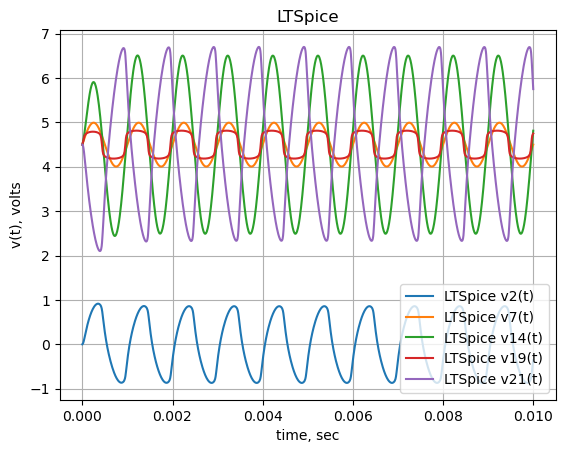

In [4]:
plt.title('LTSpice')

plt.plot(time, voltage2,label='LTSpice v2(t)')
plt.plot(time, voltage7,label='LTSpice v7(t)')
plt.plot(time, voltage14,label='LTSpice v14(t)')
plt.plot(time, voltage19,label='LTSpice v19(t)')
plt.plot(time, voltage21,label='LTSpice v21(t)')

plt.ylabel('v(t), volts')
plt.xlabel('time, sec')

plt.legend()
plt.grid()
plt.show()

In [5]:
voltage7.mean()

In [6]:
voltage7.min()

In [7]:
voltage7.max()

peak to peak

In [8]:
voltage7.max()-voltage7.min()

In [9]:
def rms(x):
    return np.sqrt(np.vdot(x, x)/x.size)

In [10]:
rms(voltage7)

- LTSpice average = 4.4985V
- LTSpice rms = 4.5121V

[Crest factor](https://en.wikipedia.org/wiki/Crest_factor)

Music has a widely varying crest factor. Typical values for a processed mix are around 4–8 (which corresponds to 12–18 dB of headroom, usually involving audio level compression), and 8–10 for an unprocessed recording (18–20 dB).
    
    

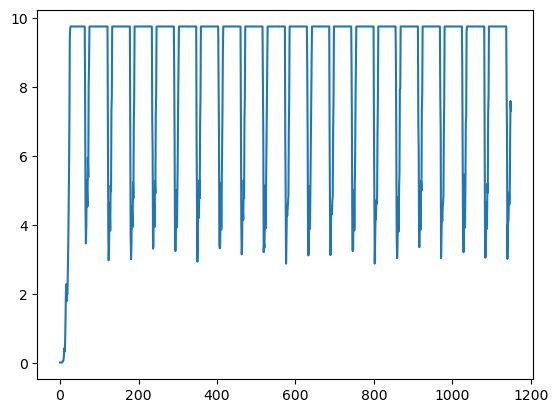

In [11]:
#plt.plot(np.gradient(time)/1e-6)
plt.plot(np.ediff1d(time)/1e-6)
plt.show()

### FFT calculation

- what are the units?
- converting to power or dBm

In [12]:
import scipy.fft
from scipy.signal import blackman

Use a window function

In [13]:
#w = tukey(n)
fft_window = blackman(len(voltage2))
yw = voltage2*fft_window

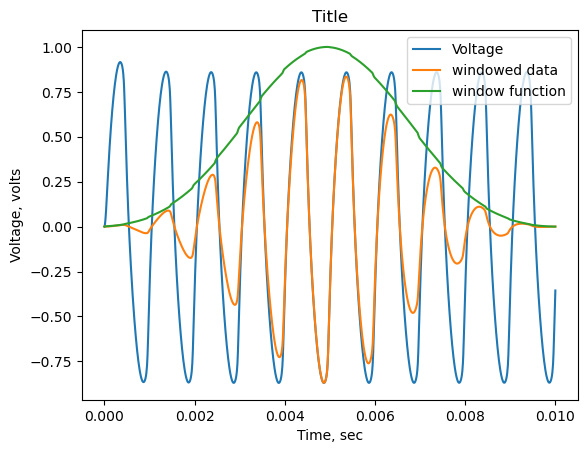

In [14]:
# plot the data
plt.plot(time,voltage2)
plt.plot(time,yw)
plt.plot(time,fft_window)
plt.xlabel('Time, sec')
plt.ylabel('Voltage, volts')
plt.legend(['Voltage', 'windowed data', 'window function'], loc='best')
plt.title('Title')
plt.show()

In [15]:
print('peak value: {:.3f} volts'.format(yw.max()))

peak value: 0.835 volts


The fftfreq() function returns a float array containing the frequency bin centers in cycles per unit of the sample spacing (with zero at the start). Since the sample spacing is in seconds, the frequency unit is cycles/second.

In [16]:
time

array([0.00000000e+00, 7.14285723e-09, 1.42857145e-08, ...,
       9.98508519e-03, 9.99268348e-03, 1.00000000e-02])

In [17]:
time[1]

In [18]:
dt = time[1]

In [19]:
sample_freq = scipy.fft.fftfreq(len(voltage2), 1./len(voltage2))
fft_y = scipy.fft.fft(yw)

In [20]:
sample_freq

array([ 0.,  1.,  2., ..., -3., -2., -1.])

Plot the data on a semilog scale.

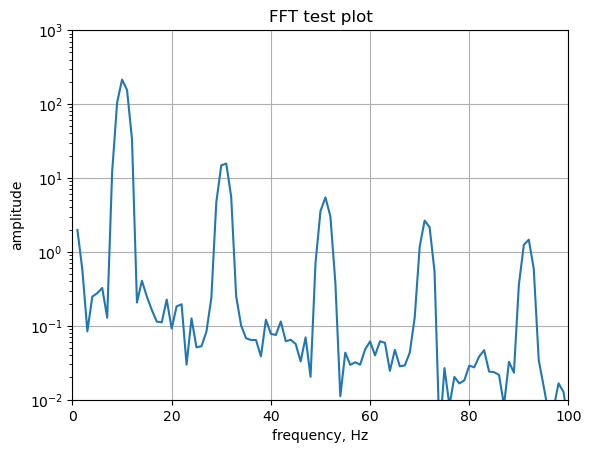

In [21]:
pidxs = np.where(sample_freq > 0)
freqs, amplitude = sample_freq[pidxs], np.abs(fft_y[pidxs])
#amplitude *= dt
plt.semilogy(freqs,amplitude)
plt.xlim(0,100)
plt.ylim(0.01,1000)
plt.ylabel('amplitude')
plt.xlabel('frequency, Hz')
plt.title('FFT test plot')
plt.grid()
plt.show()

resample(x, num, t=None, axis=0, window=None, domain='time')

In [22]:
fft_window = blackman(len(voltage2))

In [23]:
fft_window

array([-1.38777878e-17,  2.68665095e-06,  1.07469513e-05, ...,
        1.07469513e-05,  2.68665095e-06, -1.38777878e-17])

In [24]:
voltage2_rs = scipy.signal.resample(voltage2, len(voltage2), window='blackman', domain='time')

In [25]:
time_rs = np.linspace(0,10e-3,len(voltage2_rs))

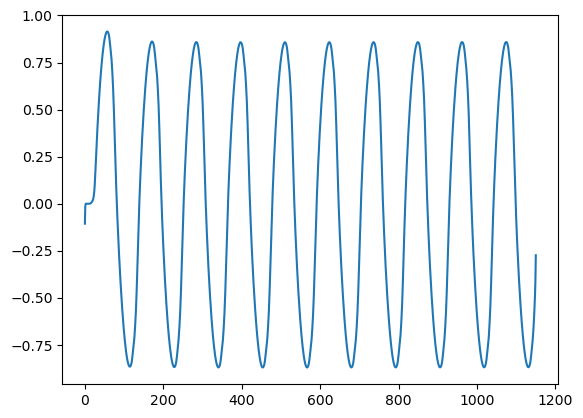

In [26]:
plt.plot(voltage2_rs)
plt.show()

In [27]:
len(voltage2_rs)

In [28]:
len(voltage2)

In [29]:
num_samples = len(voltage2_rs)
stop_time = 10e-3
sps = num_samples/stop_time
sps

In [30]:
nyquist_freq = sps/2
nyquist_freq

In [31]:
nyquist_freq/533

In [32]:
#w = tukey(n)
fft_window = blackman(len(voltage2_rs))
yw = voltage2_rs*fft_window

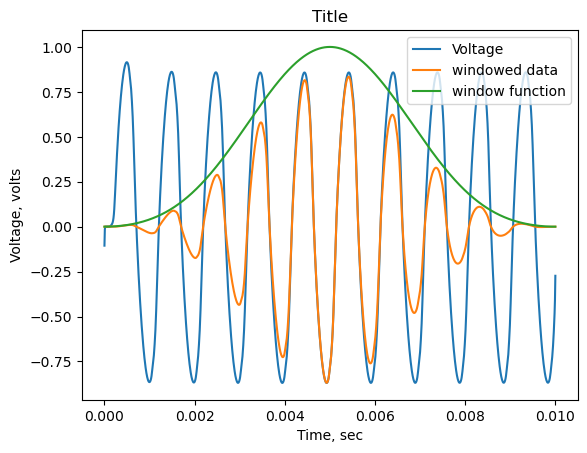

In [33]:
# plot the data
plt.plot(time_rs,voltage2_rs)
plt.plot(time_rs,yw)
plt.plot(time_rs,fft_window)
plt.xlabel('Time, sec')
plt.ylabel('Voltage, volts')
plt.legend(['Voltage', 'windowed data', 'window function'], loc='best')
plt.title('Title')
plt.show()

In [34]:
sample_freq = scipy.fft.fftfreq(len(voltage2_rs), 1./len(voltage2_rs))
fft_y = scipy.fft.fft(yw)

In [35]:
sample_freq

array([ 0.,  1.,  2., ..., -3., -2., -1.])

In [36]:
len(fft_y)

Plot the data on a semilog scale.

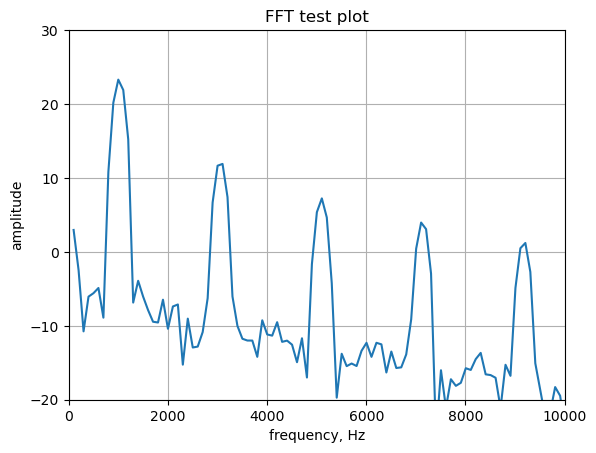

In [37]:
pidxs = np.where(sample_freq > 0)
freqs, amplitude = sample_freq[pidxs], np.abs(fft_y[pidxs])
#amplitude *= dt
#plt.semilogy(freqs,amplitude)
plt.plot(freqs*nyquist_freq/len(pidxs[0]),10*np.log10(amplitude))
plt.xlim(0,10000)
plt.ylim(-20,30)
plt.ylabel('amplitude')
plt.xlabel('frequency, Hz')
plt.title('FFT test plot')
plt.grid()
plt.show()

Load the csv file of frequency response data from LTSpice.

In [38]:
fn = 'Klon-Centaur_v2_freq_resp.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',',skip_header=1)

In [39]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
H_v2 = np.zeros(len(LTSpice_data)).astype(complex)

In [40]:
# convert the csv data to complex numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    H_v2[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j


Plot the results.  
Using

> np.unwrap(2 * phase) / 2) 

to keep the pahse plots the same.

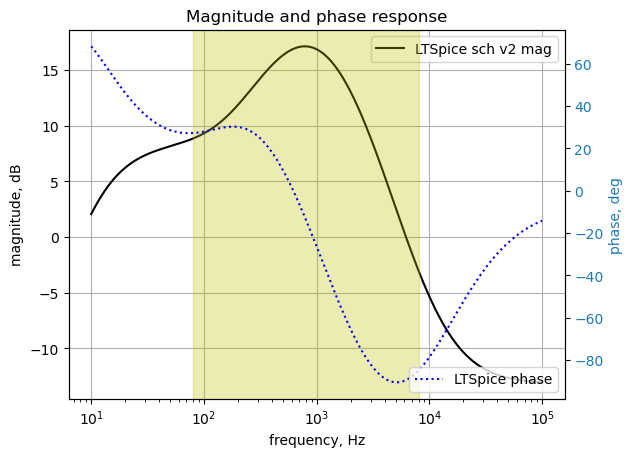

In [41]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

#w, mag, phase = effect_path_end_end_mag_phase

plt.semilogx(frequency[0:-1], 20*np.log10(np.abs(H_v2)[0:-1]),'-k',label='LTSpice sch v2 mag')    # LTSpice magnitude plot
#plt.semilogx(w/(2*np.pi), mag,'-r',label='MNA mag, dB')    # MNA magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()
plt.legend(loc='upper right')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency[0:-1], np.unwrap(2*np.angle(H_v2)[0:-1]/2) *180/np.pi,':',color='b',label='LTSpice phase')  # LTSpice phase plot
#plt.semilogx(w/(2*np.pi), phase,':',color='r',label='MNA phase')  # MNA phase plot
plt.legend(loc='lower right')

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.title('Magnitude and phase response')
plt.show()

[Texas Instruments PSpice Model](https://www.ti.com/product/TL072?bm-verify=AAQAAAAJ_____-lTe0JulZ9CqD5uoWAVyNnjsrL88hHq1vTru3T9CqLbfuaSyDLIOOpld10D0GSD9kvMmc1SIOS_B4yZl2__HuJmwsX4W7hXggYazZRQuYuQegllzmDro9t5E_gCIMIqZrGSbZvjrU33jzkVcyOEV0FzFtD9sW-WcIaexAXWykgbLqWmO-3IkAqOuFuHutaWX_SEf0gOZASn23dYYQitU4qrudYAGx_Lj3xIBKe7Jb-z4oKmxI5M7riaPhBJ3hTxnAj-S72-AY7OeTxKtwmZ3IwkjE0BOG__IEnDF6BUVrNJIw#design-development)
```
* TL072 OPERATIONAL AMPLIFIER "MACROMODEL" SUBCIRCUIT
* CREATED USING PARTS RELEASE 4.01 ON 06/16/89 AT 13:08
* (REV N/A)      SUPPLY VOLTAGE: +/-15V
* CONNECTIONS:   NON-INVERTING INPUT
*                | INVERTING INPUT
*                | | POSITIVE POWER SUPPLY
*                | | | NEGATIVE POWER SUPPLY
*                | | | | OUTPUT
*                | | | | |
.SUBCKT TL072    1 2 3 4 5
*
  C1   11 12 3.498E-12
  C2    6  7 15.00E-12
  DC    5 53 DX
  DE   54  5 DX
  DLP  90 91 DX
  DLN  92 90 DX
  DP    4  3 DX
  EGND 99  0 POLY(2) (3,0) (4,0) 0 .5 .5
  FB    7 99 POLY(5) VB VC VE VLP VLN 0 4.715E6 -5E6 5E6 5E6 -5E6
  GA    6  0 11 12 282.8E-6
  GCM   0  6 10 99 8.942E-9
  ISS   3 10 DC 195.0E-6
  HLIM 90  0 VLIM 1K
  J1   11  2 10 JX
  J2   12  1 10 JX
  R2    6  9 100.0E3
  RD1   4 11 3.536E3
  RD2   4 12 3.536E3
  RO1   8  5 150
  RO2   7 99 150
  RP    3  4 2.143E3
  RSS  10 99 1.026E6
  VB    9  0 DC 0
  VC    3 53 DC 2.200
  VE   54  4 DC 2.200
  VLIM  7  8 DC 0
  VLP  91  0 DC 25
  VLN   0 92 DC 25
.MODEL DX D(IS=800.0E-18)
.MODEL JX PJF(IS=15.00E-12 BETA=270.1E-6 VTO=-1)
.ENDS
```

[SPICE model from STMicroelectronics](https://www.st.com/en/amplifiers-and-comparators/tl072.html#cad-resources)

this model generates errors

```
* WARNING : please consider following remarks before usage
*
* 1) All models are a tradeoff between accuracy and complexity (ie. simulation 
*    time).
* 2) Macromodels are not a substitute to breadboarding, they rather confirm the
*    validity of a design approach and help to select surrounding component values.
*
* 3) A macromodel emulates the NOMINAL performance of a TYPICAL device within 
*    SPECIFIED OPERATING CONDITIONS (ie. temperature, supply voltage, etc.).
*    Thus the macromodel is often not as exhaustive as the datasheet, its goal
*    is to illustrate the main parameters of the product.
*
* 4) Data issued from macromodels used outside of its specified conditions
*    (Vcc, Temperature, etc) or even worse: outside of the device operating 
*    conditions (Vcc, Vicm, etc) are not reliable in any way.


** Standard Linear Ics Macromodels, 1993. 
** CONNECTIONS :
* 1 INVERTING INPUT
* 2 NON-INVERTING INPUT
* 3 OUTPUT
* 4 POSITIVE POWER SUPPLY
* 5 NEGATIVE POWER SUPPLY
.SUBCKT TL07x 1 2 3 4 5
**********************************************************
.MODEL MDTH D IS=1E-8 KF=5.306587E-14 CJO=10F
* INPUT STAGE
CIP 2 5 1.000000E-12
CIN 1 5 1.000000E-12
EIP 10 5 2 5 1
EIN 16 5 1 5 1
RIP 10 11 1.130435E+00
RIN 15 16 1.130435E+00
RIS 11 15 2.476554E-01
DIP 11 12 MDTH 400E-12
DIN 15 14 MDTH 400E-12
VOFP 12 13 DC 0
VOFN 13 14 DC 0
IPOL 13 5 2.300000E-04
CPS 11 15 4.091333E-08
DINN 17 13 MDTH 400E-12
VIN 17 5 3.000000e+00
DINR 15 18 MDTH 400E-12
VIP 4 18 0.000000E+00
FCP 4 5 VOFP 6.096957E+00
FCN 5 4 VOFN 6.096957E+00
* AMPLIFYING STAGE
FIP 5 19 VOFP 8.217391E+02
FIN 5 19 VOFN 8.217391E+02
RG1 19 5 1.112645E+06
RG2 19 4 1.112645E+06
CC 19 29 1.300000E-08
HZTP 30 29 VOFP 7.743183E+02
HZTN  5 30 VOFN 7.743183E+02
DOPM 19 22 MDTH 400E-12
DONM 21 19 MDTH 400E-12
HOPM 22 28 VOUT 3.750000E+03
VIPM 28 4 1.500000E+02
HONM 21 27 VOUT 3.750000E+03
VINM 5 27 1.500000E+02
EOUT 26 23 19 5 1
VOUT 23 5 0
ROUT 26 3 9.384786E+01
COUT 3 5 1.000000E-12
DOP 19 25 MDTH 400E-12
VOP 4 25 3.259753E+00
DON 24 19 MDTH 400E-12
VON 24 5 3.259753E+00
.ENDS; TL07x
```



## TL072 Op Amp


[TL072](https://www.ti.com/product/TL072?bm-verify=AAQAAAAJ_____4l2d6J1dP-up0vwzV75bF018toeB6LvlnsE608z6iBbtlasxEASuWLQUYtzLESDjkX0dSsHD60J9zGYP0c54tzWogKch76Q4F0jkyRIy1M6yC_v9XfTRzpoIY_OO1AZMjCPP2TX-ZhA0f0IQH4K51wgft8CjuH6gbEF7DTNCQYFlJUKVsc0gvaEJpaTaAomByzKNyQf00fndw_mtFdOnFJ5NWqeafPGWHyOvVfL32vIDhFOZ5bHShMDSWaNUvjfcX4dZHJ6q5rSV19vIAJ8RrT9ZTdFzS-t6HtxLmXoF4DHwg)

Dual, high slew rate, JFET-input op amp

This product continues to be available for existing customers. New designs should consider an alternate product.

The TL07xH (TL071H, TL072H, and TL074H) family of devices are the next-generation versions of the industry-standard TL07x (TL071, TL072, and TL074) devices. These devices provide outstanding value for cost-sensitive applications, with features including low offset (1 mV, typical), high slew rate (20 V/µs), and common-mode input to the positive supply. High ESD (1.5 kV, HBM), integrated EMI and RF filters, and operation across the full –40°C to 125°C enable the TL07xH devices to be used in the most rugged and demanding applications. 

Low-Noise FET-Input Operational Amplifier
High slew rate: 20 V/μs
Wide supply voltage:
±2.25 V to ±20 V, 4.5 V to 40 V

Digikey

[STMicroelectronics](https://www.digikey.com/en/products/filter/instrumentation-op-amps-buffer-amps/687?s=N4IgjCBcoLQdIDGUBmBDANgZwKYBoQB7KAbRABYBOAdhAF0BfBggJlJABcMAGatxoA)

https://www.st.com/en/amplifiers-and-comparators/tl072.html

[Texas Instruments](https://www.digikey.com/en/products/filter/instrumentation-op-amps-buffer-amps/687?s=N4IgjCBcoLQdIDGUBmBDANgZwKYBoQB7KAbRACYBOANhAF0BfBg80kAFwwAYB2VxoA)





[Op amps in small-signal audio design – Part 1: Op amp history, properties](https://www.eetimes.com/op-amps-in-small-signal-audio-design-part-1-op-amp-history-properties/)

[Op amps in small-signal audio design – Part 2: Distortion in bipolar and JFET input op-amps](https://www.eetimes.com/Op-amps-in-small-signal-audio-design---Part-2--Distortion-in-bipolar-and-JFET-input-op-amps/?Ecosystem=audio-design/)

[Op amps in small-signal audio design – Part 3: Selecting the right op amp](https://www.eetimes.com/op-amps-in-small-signal-audio-design-part-3-selecting-the-right-op-amp/)

### Slew rate

### Power rails

AC signal gain along the path

## Clipping diodes
The clipping diodes used in the Klon Centuar are a special type of 1N34A, a general purpose point contact Germanium diode, chosen for their sound qualities. The orginal type of Germanium diodes are no longer readily available and some experementers have started to used modern Silicon diodes. Some people claim that there is difference in the sound produced by different diodes. I haven't seen any published studies confirming this claim. 

The main difference between Germanium and Silicon diodes is the forward voltage drop. A low drop Schottky rectifier such as 1N5817 connected in series with a Schottky Barrier Rectifier diode, such as CDBB1100-HF, would have a combined forward voltage drop simular to a Germanium diode.

Diode model

```
.model 1N34A D(bv=75 cjo=0.5e-12 eg=0.67 ibv=18e-3 is=2e-7 rs=7 n=1.3 vj=0.1 m=0.27)
```




Most online commenters seem to focus on the forward voltage drop of Germainum diodes along with some sonic qualities.

[Forward voltage of various diodes](https://therepaircafe.wordpress.com/2019/10/24/forward-voltage-of-various-diodes/): 
> Me and Dylan and David from the DIY guitar pedal/effects community decided to see for ourselves what the fuzz is about regarding diodes and their “softness”. Why do people like germaniums over silicons? What is the effect of multiple diodes in series? How exactly does the PN junction of a MOSFET look like? All these questions and more will be answered.

[Emulating germanium diodes](https://therepaircafe.wordpress.com/2020/07/14/emulating-germanium-diodes/)

> When you get into vintage effect pedals etc. you might get to know the amazing germanium diode. These diodes are truly worse in every way compared to silicon diodes, and thus aren’t being produced anymore. This makes them a treasure for those who are chasing the vintage tone. Luckily here and there germanium diode surplusses are still being sold with nice profit margins.

> But what is so special about germanium? Well, people claim that they clip “softer” than silicon diodes. This makes your tone sound “smoother” and whatever. In my post about testing diodes it is clear that the knee (slope) of germanium diodes is indeed smoother than those of silicon diodes so that’s one way to prove that it has “some” impact on your tone. But can’t we emulate this soft knee in some way?

> The blogpost also showed how you can simply put diodes in series to double the forward voltage, but also make the knee softer. Putting 4 or more silicons in series gets you close to the softness of a germanium, but with a forward voltage of 2.8V.

Proper investigation should include (what is the proper sample size?)

- static test: this is what most do and just look at the forward voltage
- dynamic test: square wave and pulse tests, harmonic content generated, 
- white and pink noise tests: harmonic content generated
- blind listening tests, based on what is tone YouTube videos, mic and cabnet (headphones) have substaintal inputs

### schematics of the diodes

- orginal diodes
- series Schottky diodes

simular FFT for each.

![Schematic of diode test jig](diode_test_jig.png){#fig-diode-test-jig}

In [42]:
fn = 'Diode-vi-curve.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',',skip_header=1)

Copy the data from the csv file into NumPy arrays.

In [43]:
# initaliase some empty arrays
D_1N34A_voltage = np.zeros(len(LTSpice_data))
D_1N34A_diode_current = np.zeros(len(LTSpice_data))
D_1N914_voltage = np.zeros(len(LTSpice_data))
D_1N914_diode_current = np.zeros(len(LTSpice_data))

# load csv data into the array
for i in range(len(LTSpice_data)):
    D_1N34A_voltage[i] = LTSpice_data[i][0]
    D_1N34A_diode_current[i] = LTSpice_data[i][1]*1000
    D_1N914_voltage[i] = LTSpice_data[i][2]
    D_1N914_diode_current[i] = LTSpice_data[i][3]*1000

Plot the LTSpice data and the Python data to see if they agree.

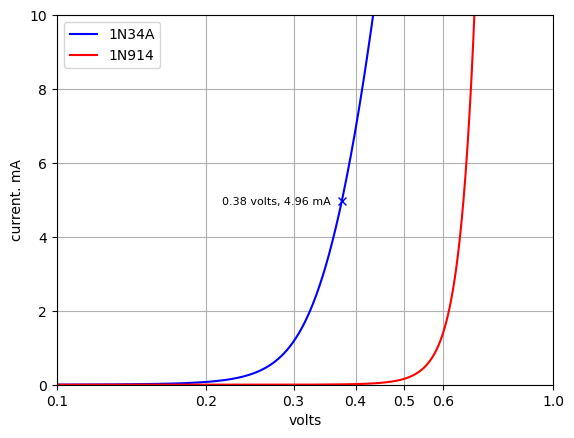

In [44]:
#| label: fig-diode_volts_current_plot
#| echo: true
#| fig-cap: Voltage vs current plot for 1N34A and 1N914 diodes.

fig1, ax1 = plt.subplots()
ax1.plot([10, 100, 1000], [1,2,3])

ax1.text(D_1N34A_voltage[1375], D_1N34A_diode_current[1375], '{:.2f} volts, {:.2f} mA   '.format(D_1N34A_voltage[1375], D_1N34A_diode_current[1375]), fontsize=8, horizontalalignment='right', verticalalignment='center')

ax1.plot(D_1N34A_voltage, D_1N34A_diode_current,'-b',label='1N34A')
ax1.plot(D_1N34A_voltage[1375], D_1N34A_diode_current[1375],'xb')

ax1.plot(D_1N914_voltage, D_1N914_diode_current,'-r',label='1N914')

ax1.set_xlim(0.1,1)
ax1.set_ylim(0,10)

ax1.set_xlabel('volts')
ax1.set_ylabel('current. mA')

ax1.set_xscale('log')
ax1.set_xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0])
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax1.get_xaxis().set_tick_params(which='minor', size=0)
ax1.get_xaxis().set_tick_params(which='minor', width=0)

ax1.grid()
ax1.legend()
plt.show()

add some dialog

## Power supply voltages
9v, 4.5v, 

U1a and U1b power supply levels: 9V and ground

U2a and U2b power levels
+V2 = 18V
-V = 9V

- +9V: This is the standard voltage supplied by a 9-volt battery.  A 47 μF capacitor stabilizes the voltage.  Diode D4 prevents polarity inversion, meaning that the positive and negative power connections cannot be accidentally reversed.
- +4.5V: The +9V is divided by two using resistors R29 and R30 to produce +4.5V. Capacitor C18 stabilizes this voltage.
- -9V and +18V: The MAX1044 integrated circuit transforms the +9V voltage to produce -9V and +18V. 

ICL7660

The MAX1044 and ICL7660 are monolithic, CMOS switched-capacitor voltage converters that invert, double, divide, or multiply a positive input voltage. They are pin compatible with the industry-standard ICL7660 and LTC1044. Operation is guaranteed from 1.5V to 10V with no external diode over the full temperature range. They deliver 10mA with a 0.5V output drop. The MAX1044 has a BOOST pin that raises the oscillator frequency above the audio band and reduces external capacitor size requirements.

The MAX1044/ICL7660 combine low quiescent current and high efficiency. Oscillator control circuitry and four power MOSFET switches are included on-chip. Applications include generating a -5V supply from a +5V logic supply to power analog circuitry. For applications requiring more power, the MAX660 delivers up to 100mA with a voltage drop of less than 0.65V.

The MAX1044 and ICL7660 are monolithic, CMOS
switched-capacitor voltage converters that invert, double,
divide, or multiply a positive input voltage. They are
pin compatible with the industry-standard ICL7660 and
LTC1044. Operation is guaranteed from 1.5V to 10V with
no external diode over the full temperature range. They
deliver 10mA with a 0.5V output drop. The MAX1044 has
a BOOST pin that raises the oscillator frequency above
the audio band and reduces external capacitor size
requirements.
The MAX1044/ICL7660 combine low quiescent current and
high efficiency. Oscillator control circuitry and four power
MOSFET switches are included on-chip. Applications
include generating a -5V supply from a +5V logic supply
to power analog circuitry. For applications requiring more
power, the MAX660 delivers up to 100mA with a voltage
drop of less than 0.65V.


Digikey

Renesas Electronics Corporation
[ICL7660CPAZ](https://www.digikey.com/en/products/detail/renesas-electronics-corporation/ICL7660CPAZ/1034926)

Analog Devices Inc./Maxim Integrated
[ICL7660CPA+](https://www.digikey.com/en/products/detail/analog-devices-inc-maxim-integrated/ICL7660CPA/1303023)




### Levels in the signal chain
The maximum output voltage swing is 3vpp.
With a 1kHz frequency @ 46mVpp input signal, the swing at the output of U1a is 70mVpp. The swing at the output of U1b is 6.4Vpp. This would 

For U2a and U2b power levels are -9V and +18V. The output swing of U2a is +/-1.4Vpp. U2b output is 3.2Vpp.

based om the above, it doesn't seem like increasing the rails to -9V/+18V for U2 is not needed as long as the input level stays below 50mVpp.

At 100Hz levels are lower than at 1kHz.

- slew rate distortion?

- Op Amp clipping? Looking at combined path v1 schematic, Op AMps just on the edge of hitting the rails, a function of Rgain and input level
  - w/ input of 0.06Vp and Rgain=99.9k, U1B is just hiting the rails. The signal level at U2A's output is about 1.9Vp.
  - w/ Rgain=0.1k and input of 6Vp, U1B is 0.4Vp and U2A is 3Vp
  - w/ Rgain=50k and input of 1Vp, U1B is 3.7Vp and U2A is 2.9Vp

TL072 Low-Noise FET-Input Operational Amplifier

- High slew rate: 20 V/μs (TL07xH, typ)
- Low offset voltage: 1 mV (TL07xH, typ)
- Low offset voltage drift: 2 μV/°C
- Low power consumption: 940 μA/ch (TL07xH, typ)
- Wide supply voltage: ±2.25 V to ±20 V, 4.5 V to 40 V

We can rewrite our Equation in a more convenient form:

 Slew Rate required =2πVpfmax(5.4.2)

where Vp
is the peak voltage swing required and fmax

is the highest frequency sine wave reproduced. Often, it is desirable to know just how “fast” a given op amp is. A further rearranging yields

fmax=Slew Rate2πVp

In this case, fmax represents the highest frequency sine wave that the op amp can reproduce without producing Slewing Induced Distortion (SID). 

#### Levels at 1kHz
superposition of V1 and replace diodes with 0.3 Vpp source, check calculations with LTSpice,  

What are the rail levels?

with all pots at maximum, Freq = 1kHz
 
- U1b start to clip at V1=0.05vpp
- Rgain=500 $\Omega$, V1=0.5, diodes just start to clip.
- Rgain=50k, V1=0.5, Node 21 runs from 8.5 to 0.5 volts peak to peak.

In [45]:
f_max = 15e3
Vp = 10
required_slew_rate = 2*np.pi*Vp*f_max
required_slew_rate*1e-6

Peak signal

10mV input from the guitar x gain

In [46]:
guitar_signal_Vrms = 10e-3 # volts
guitar_signal_Vp = guitar_signal_Vrms/0.707
signal_path_gain_dB = 50
max_signal = guitar_signal_Vp * 10**(signal_path_gain_dB/20)
max_signal

## Voltage gain sweep
Use pandas and read LTSpice csv file

In [47]:
fn = 'Node14_sweep.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',',skip_header=1)

In [48]:
LTSpice_data

array([[           nan,            nan],
       [0.00000000e+00, 4.50006500e+00],
       [1.25000001e-08, 4.50006500e+00],
       ...,
       [4.99025934e-03, 7.46466900e+00],
       [4.99514216e-03, 7.46545300e+00],
       [5.00000000e-03, 7.46619000e+00]])

In [49]:
import csv

In [50]:
csv_data = csv.reader(fn)

process data and put into an array

```
[Rgain, V1_amp, V_14pp]
```

make a 3d plot or surface plot.

In [51]:
with open(fn, newline='') as csvfile:
    csv_data_obj = csv.reader(csvfile)
    count = 0
    for row in csv_data_obj:
        print(row)
        count += 1
        if count == 10:
            break

['time', 'V(14)']
['Step Information: Rgain=1 V1_amp=100m  (Step: 1/25)', '']
['0', '4.500065']
['1.25000001460762E-08', '4.500065']
['2.50000002921524E-08', '4.500065']
['5.00000005843049E-08', '4.500065']
['1.0000000116861E-07', '4.500065']
['1.64014985985606E-07', '4.500065']
['2.32493783678236E-07', '4.500066']
['3.06618137335682E-07', '4.500068']


In [52]:
df = pd.read_csv(fn, index_col=0)

In [53]:
df

,V(14)
time,
Step Information: Rgain=1 V1_amp=100m (Step: 1/25),NaN
0,4.500065
1.25000001460762E-08,4.500065
2.50000002921524E-08,4.500065
5.00000005843049E-08,4.500065
...,...
0.00498049371973717,7.462912
0.00498537653223716,7.463823
0.00499025934473717,7.464669


## Comparison of MNA and LTSpice results {#sec-Comparison_of_MNA_and_LTSpice_results}

When the switch is 

- put end to end path here
- describe code and results
  - what are the pot settings and why these?
  
See @fig-Klon-Centaur_sch

- what is the overall gain?
- use schematic klon_centuar_v1, update v1 1st
- move this section to top of notebook.
  - use as intro to circuit functions and description
- determine pot settings and use throughout notebook

can be done with LTSpice w/ diodes in circuit. but do here to show that MNA and LTSpice mag response are the same, use 

Load the net list

In [54]:
net_list = '''
* Klon-Centaur_v1.asc
V1 1 0 1
R1 3 1 10e3
R2 0 4 1000e3
C1 4 3 100e-9
R5 7 25 5.1e3
R8 25 0 1.5e3
C3 8 7 100e-9
C4 7 25 68e-9
C6 25 26 390e-9
R9 26 0 1e3
R6 9 8 10e3
C5 9 8 68e-9
Rp1b2 25 27 50e3
Rp1a2 27 0 50e3
Rp1b1 11 0 50e3
Rp1a1 0 9 50e3
R10 12 11 2e3
R11 13 12 15e3
C7 13 12 82e-9
C8 14 13 390e-12
R12 14 13 422e3
R13 16 15 1e3
C11 17 28 2.2e-9
R15 28 27 22e3
R17 18 27 27e3
R18 29 27 12e3
C12 18 29 27e-9
R16 18 17 47e3
R7 8 10 1.5e3
R24 18 10 15e3
R20 19 18 392e3
C13 19 18 820e-12
R21 19 32 1.8e3
R22 20 19 100e3
Rp2a 32 30 5e3
Rp2b 30 31 5e3
C14 20 30 3.9e-9
R241 21 20 100e3
R25 23 22 560
R23 21 31 4.7e3
O1a 7 4 7
O1b 13 9 14
O2a 18 0 19
O2b 20 0 21
R3 5 0 100e3
R4 6 5 560
*D2 0 16 1N34A
*D3 16 0 1N34A
C2 7 5 4.7e-6
C16 10 0 1e-6
C9 14 15 1e-6
C10 17 16 1e-6
C15 21 22 4.7e-6
R26 2 6 68e3
R28 2 0 100e3
Rp3a 23 24 50e3
Rp3b 24 0 50e3
R27 2 24 0.01
'''

Call the symbolic modified nodal analysis function

In [55]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

In [56]:
print(report)

Net list report
number of lines in netlist: 56
number of branches: 52
number of nodes: 32
number of unknown currents: 5
number of RLC (passive components): 51
number of resistors: 35
number of capacitors: 16
number of inductors: 0
number of independent voltage sources: 1
number of independent current sources: 0
number of Op Amps: 4
number of E - VCVS: 0
number of G - VCCS: 0
number of F - CCCS: 0
number of H - CCVS: 0
number of K - Coupled inductors: 0



Build the network equations

In [57]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

In [58]:
len(NE_sym.lhs)

In [59]:
# display the equations
temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{V1} + \frac{v_{1}}{R_{1}} - \frac{v_{3}}{R_{1}}$<br>$0 = v_{2} \cdot \left(\frac{1}{R_{28}} + \frac{1}{R_{27}} + \frac{1}{R_{26}}\right) - \frac{v_{24}}{R_{27}} - \frac{v_{6}}{R_{26}}$<br>$0 = - C_{1} s v_{4} + v_{3} \left(C_{1} s + \frac{1}{R_{1}}\right) - \frac{v_{1}}{R_{1}}$<br>$0 = - C_{1} s v_{3} + v_{4} \left(C_{1} s + \frac{1}{R_{2}}\right)$<br>$0 = - C_{2} s v_{7} + v_{5} \left(C_{2} s + \frac{1}{R_{4}} + \frac{1}{R_{3}}\right) - \frac{v_{6}}{R_{4}}$<br>$0 = v_{6} \cdot \left(\frac{1}{R_{4}} + \frac{1}{R_{26}}\right) - \frac{v_{5}}{R_{4}} - \frac{v_{2}}{R_{26}}$<br>$0 = - C_{2} s v_{5} - C_{3} s v_{8} + I_{O1a} + v_{25} \left(- C_{4} s - \frac{1}{R_{5}}\right) + v_{7} \left(C_{2} s + C_{3} s + C_{4} s + \frac{1}{R_{5}}\right)$<br>$0 = - C_{3} s v_{7} + v_{8} \left(C_{3} s + C_{5} s + \frac{1}{R_{7}} + \frac{1}{R_{6}}\right) + v_{9} \left(- C_{5} s - \frac{1}{R_{6}}\right) - \frac{v_{10}}{R_{7}}$<br>$0 = v_{8} \left(- C_{5} s - \frac{1}{R_{6}}\right) + v_{9} \left(C_{5} s + \frac{1}{Rp1a1} + \frac{1}{R_{6}}\right)$<br>$0 = v_{10} \left(C_{16} s + \frac{1}{R_{7}} + \frac{1}{R_{24}}\right) - \frac{v_{8}}{R_{7}} - \frac{v_{18}}{R_{24}}$<br>$0 = v_{11} \cdot \left(\frac{1}{Rp1b1} + \frac{1}{R_{10}}\right) - \frac{v_{12}}{R_{10}}$<br>$0 = v_{12} \left(C_{7} s + \frac{1}{R_{11}} + \frac{1}{R_{10}}\right) + v_{13} \left(- C_{7} s - \frac{1}{R_{11}}\right) - \frac{v_{11}}{R_{10}}$<br>$0 = v_{12} \left(- C_{7} s - \frac{1}{R_{11}}\right) + v_{13} \left(C_{7} s + C_{8} s + \frac{1}{R_{12}} + \frac{1}{R_{11}}\right) + v_{14} \left(- C_{8} s - \frac{1}{R_{12}}\right)$<br>$0 = - C_{9} s v_{15} + I_{O1b} + v_{13} \left(- C_{8} s - \frac{1}{R_{12}}\right) + v_{14} \left(C_{8} s + C_{9} s + \frac{1}{R_{12}}\right)$<br>$0 = - C_{9} s v_{14} + v_{15} \left(C_{9} s + \frac{1}{R_{13}}\right) - \frac{v_{16}}{R_{13}}$<br>$0 = - C_{10} s v_{17} + v_{16} \left(C_{10} s + \frac{1}{R_{13}}\right) - \frac{v_{15}}{R_{13}}$<br>$0 = - C_{10} s v_{16} - C_{11} s v_{28} + v_{17} \left(C_{10} s + C_{11} s + \frac{1}{R_{16}}\right) - \frac{v_{18}}{R_{16}}$<br>$0 = - C_{12} s v_{29} + v_{18} \left(C_{12} s + C_{13} s + \frac{1}{R_{24}} + \frac{1}{R_{20}} + \frac{1}{R_{17}} + \frac{1}{R_{16}}\right) + v_{19} \left(- C_{13} s - \frac{1}{R_{20}}\right) - \frac{v_{10}}{R_{24}} - \frac{v_{27}}{R_{17}} - \frac{v_{17}}{R_{16}}$<br>$0 = I_{O2a} + v_{18} \left(- C_{13} s - \frac{1}{R_{20}}\right) + v_{19} \left(C_{13} s + \frac{1}{R_{22}} + \frac{1}{R_{21}} + \frac{1}{R_{20}}\right) - \frac{v_{20}}{R_{22}} - \frac{v_{32}}{R_{21}}$<br>$0 = - C_{14} s v_{30} + v_{20} \left(C_{14} s + \frac{1}{R_{241}} + \frac{1}{R_{22}}\right) - \frac{v_{21}}{R_{241}} - \frac{v_{19}}{R_{22}}$<br>$0 = - C_{15} s v_{22} + I_{O2b} + v_{21} \left(C_{15} s + \frac{1}{R_{241}} + \frac{1}{R_{23}}\right) - \frac{v_{20}}{R_{241}} - \frac{v_{31}}{R_{23}}$<br>$0 = - C_{15} s v_{21} + v_{22} \left(C_{15} s + \frac{1}{R_{25}}\right) - \frac{v_{23}}{R_{25}}$<br>$0 = v_{23} \cdot \left(\frac{1}{Rp3a} + \frac{1}{R_{25}}\right) - \frac{v_{24}}{Rp3a} - \frac{v_{22}}{R_{25}}$<br>$0 = v_{24} \cdot \left(\frac{1}{Rp3b} + \frac{1}{Rp3a} + \frac{1}{R_{27}}\right) - \frac{v_{23}}{Rp3a} - \frac{v_{2}}{R_{27}}$<br>$0 = - C_{6} s v_{26} + v_{25} \left(C_{4} s + C_{6} s + \frac{1}{Rp1b2} + \frac{1}{R_{8}} + \frac{1}{R_{5}}\right) + v_{7} \left(- C_{4} s - \frac{1}{R_{5}}\right) - \frac{v_{27}}{Rp1b2}$<br>$0 = - C_{6} s v_{25} + v_{26} \left(C_{6} s + \frac{1}{R_{9}}\right)$<br>$0 = v_{27} \cdot \left(\frac{1}{Rp1b2} + \frac{1}{Rp1a2} + \frac{1}{R_{18}} + \frac{1}{R_{17}} + \frac{1}{R_{15}}\right) - \frac{v_{25}}{Rp1b2} - \frac{v_{29}}{R_{18}} - \frac{v_{18}}{R_{17}} - \frac{v_{28}}{R_{15}}$<br>$0 = - C_{11} s v_{17} + v_{28} \left(C_{11} s + \frac{1}{R_{15}}\right) - \frac{v_{27}}{R_{15}}$<br>$0 = - C_{12} s v_{18} + v_{29} \left(C_{12} s + \frac{1}{R_{18}}\right) - \frac{v_{27}}{R_{18}}$<br>$0 = - C_{14} s v_{20} + v_{30} \left(C_{14} s + \frac{1}{Rp2b} + \frac{1}{Rp2a}\right) - \frac{v_{31}}{Rp2b} - \frac{v_{32}}{Rp2a}$<br>$0 = v_{31} \cdot \left(\frac{1}{Rp2b} + \frac{1}{R_{23}}\right) - \frac{v_{30}}{Rp2b} - \frac{v_{21}}{R_{23}}$<br>$0 = v_{32} \cdot \left(\frac{1}{Rp2a} + \frac{1}{R_{21}}\right) - \frac{v_{30}}{Rp2a} - \frac{v_{19}}{R_{21}}$<br>$V_{1} = v_{1}$<br>$0 = - v_{4} + v_{7}$<br>$0 = v_{13} - v_{9}$<br>$0 = v_{18}$<br>$0 = v_{20}$<br>

Turn the free symbols into SymPy variables.

In [60]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

### Numerical solution
Construct a dictionary of element values.

In [61]:
element_values = SymMNA.get_part_values(network_df)

In [62]:
element_values[V1] = 1

# bypass switch in effects position
element_values[R26] = 68e3
element_values[R27] = 0.01

# gain pot, P1
P1_value = 100e3
P1_setting = 0.5 # a percent of full scale
element_values[Rp1b2] = P1_setting*P1_value
element_values[Rp1a2] = P1_value - P1_setting*P1_value
element_values[Rp1b1] = P1_setting*P1_value
element_values[Rp1a1] = P1_value - P1_setting*P1_value

# teble pot, P2
P2_value = 10e3
P2_setting = 0.5
element_values[Rp2b] = P2_setting*P2_value
element_values[Rp2a] = P2_value - P2_setting*P2_value

#output pot, P3
P3_value = 100e3
P3_setting = 0.5
element_values[Rp3b] = P3_setting*P3_value
element_values[Rp3a] = P3_value - P3_setting*P3_value

In [63]:
# display the component values
for k,v in element_values.items():
    print('{:s} = {:s}'.format(str(k), str(v)))

V1 = 1
R1 = 10000.0
R2 = 1000000.0
C1 = 1e-07
R5 = 5100.0
R8 = 1500.0
C3 = 1e-07
C4 = 6.8e-08
C6 = 3.9e-07
R9 = 1000.0
R6 = 10000.0
C5 = 6.8e-08
Rp1b2 = 50000.0
Rp1a2 = 50000.0
Rp1b1 = 50000.0
Rp1a1 = 50000.0
R10 = 2000.0
R11 = 15000.0
C7 = 8.2e-08
C8 = 3.9e-10
R12 = 422000.0
R13 = 1000.0
C11 = 2.2e-09
R15 = 22000.0
R17 = 27000.0
R18 = 12000.0
C12 = 2.7e-08
R16 = 47000.0
R7 = 1500.0
R24 = 15000.0
R20 = 392000.0
C13 = 8.2e-10
R21 = 1800.0
R22 = 100000.0
Rp2a = 5000.0
Rp2b = 5000.0
C14 = 3.9e-09
R241 = 100000.0
R25 = 560.0
R23 = 4700.0
O1a = nan
O1b = nan
O2a = nan
O2b = nan
R3 = 100000.0
R4 = 560.0
C2 = 4.7e-06
C16 = 1e-06
C9 = 1e-06
C10 = 1e-06
C15 = 4.7e-06
R26 = 68000.0
R28 = 100000.0
Rp3a = 50000.0
Rp3b = 50000.0
R27 = 0.01


In [64]:
NE = NE_sym.subs(element_values)

Display the equations with component values.

In [65]:
temp = ''
for i in range(shape(NE.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE.rhs[i]),latex(NE.lhs[i]))

Markdown(temp)

$0 = I_{V1} + 0.0001 v_{1} - 0.0001 v_{3}$<br>$0 = 100.000024705882 v_{2} - 100.0 v_{24} - 1.47058823529412 \cdot 10^{-5} v_{6}$<br>$0 = - 1.0 \cdot 10^{-7} s v_{4} - 0.0001 v_{1} + v_{3} \cdot \left(1.0 \cdot 10^{-7} s + 0.0001\right)$<br>$0 = - 1.0 \cdot 10^{-7} s v_{3} + v_{4} \cdot \left(1.0 \cdot 10^{-7} s + 1.0 \cdot 10^{-6}\right)$<br>$0 = - 4.7 \cdot 10^{-6} s v_{7} + v_{5} \cdot \left(4.7 \cdot 10^{-6} s + 0.00179571428571429\right) - 0.00178571428571429 v_{6}$<br>$0 = - 1.47058823529412 \cdot 10^{-5} v_{2} - 0.00178571428571429 v_{5} + 0.00180042016806723 v_{6}$<br>$0 = I_{O1a} - 4.7 \cdot 10^{-6} s v_{5} - 1.0 \cdot 10^{-7} s v_{8} + v_{25} \left(- 6.8 \cdot 10^{-8} s - 0.000196078431372549\right) + v_{7} \cdot \left(4.868 \cdot 10^{-6} s + 0.000196078431372549\right)$<br>$0 = - 1.0 \cdot 10^{-7} s v_{7} - 0.000666666666666667 v_{10} + v_{8} \cdot \left(1.68 \cdot 10^{-7} s + 0.000766666666666667\right) + v_{9} \left(- 6.8 \cdot 10^{-8} s - 0.0001\right)$<br>$0 = v_{8} \left(- 6.8 \cdot 10^{-8} s - 0.0001\right) + v_{9} \cdot \left(6.8 \cdot 10^{-8} s + 0.00012\right)$<br>$0 = v_{10} \cdot \left(1.0 \cdot 10^{-6} s + 0.000733333333333333\right) - 6.66666666666667 \cdot 10^{-5} v_{18} - 0.000666666666666667 v_{8}$<br>$0 = 0.00052 v_{11} - 0.0005 v_{12}$<br>$0 = - 0.0005 v_{11} + v_{12} \cdot \left(8.2 \cdot 10^{-8} s + 0.000566666666666667\right) + v_{13} \left(- 8.2 \cdot 10^{-8} s - 6.66666666666667 \cdot 10^{-5}\right)$<br>$0 = v_{12} \left(- 8.2 \cdot 10^{-8} s - 6.66666666666667 \cdot 10^{-5}\right) + v_{13} \cdot \left(8.239 \cdot 10^{-8} s + 6.90363349131122 \cdot 10^{-5}\right) + v_{14} \left(- 3.9 \cdot 10^{-10} s - 2.3696682464455 \cdot 10^{-6}\right)$<br>$0 = I_{O1b} - 1.0 \cdot 10^{-6} s v_{15} + v_{13} \left(- 3.9 \cdot 10^{-10} s - 2.3696682464455 \cdot 10^{-6}\right) + v_{14} \cdot \left(1.00039 \cdot 10^{-6} s + 2.3696682464455 \cdot 10^{-6}\right)$<br>$0 = - 1.0 \cdot 10^{-6} s v_{14} + v_{15} \cdot \left(1.0 \cdot 10^{-6} s + 0.001\right) - 0.001 v_{16}$<br>$0 = - 1.0 \cdot 10^{-6} s v_{17} - 0.001 v_{15} + v_{16} \cdot \left(1.0 \cdot 10^{-6} s + 0.001\right)$<br>$0 = - 1.0 \cdot 10^{-6} s v_{16} - 2.2 \cdot 10^{-9} s v_{28} + v_{17} \cdot \left(1.0022 \cdot 10^{-6} s + 2.12765957446809 \cdot 10^{-5}\right) - 2.12765957446809 \cdot 10^{-5} v_{18}$<br>$0 = - 2.7 \cdot 10^{-8} s v_{29} - 6.66666666666667 \cdot 10^{-5} v_{10} - 2.12765957446809 \cdot 10^{-5} v_{17} + v_{18} \cdot \left(2.782 \cdot 10^{-8} s + 0.000127531319856548\right) + v_{19} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right) - 3.7037037037037 \cdot 10^{-5} v_{27}$<br>$0 = I_{O2a} + v_{18} \left(- 8.2 \cdot 10^{-10} s - 2.55102040816327 \cdot 10^{-6}\right) + v_{19} \cdot \left(8.2 \cdot 10^{-10} s + 0.000568106575963719\right) - 1.0 \cdot 10^{-5} v_{20} - 0.000555555555555556 v_{32}$<br>$0 = - 3.9 \cdot 10^{-9} s v_{30} - 1.0 \cdot 10^{-5} v_{19} + v_{20} \cdot \left(3.9 \cdot 10^{-9} s + 2.0 \cdot 10^{-5}\right) - 1.0 \cdot 10^{-5} v_{21}$<br>$0 = I_{O2b} - 4.7 \cdot 10^{-6} s v_{22} - 1.0 \cdot 10^{-5} v_{20} + v_{21} \cdot \left(4.7 \cdot 10^{-6} s + 0.000222765957446809\right) - 0.000212765957446809 v_{31}$<br>$0 = - 4.7 \cdot 10^{-6} s v_{21} + v_{22} \cdot \left(4.7 \cdot 10^{-6} s + 0.00178571428571429\right) - 0.00178571428571429 v_{23}$<br>$0 = - 0.00178571428571429 v_{22} + 0.00180571428571429 v_{23} - 2.0 \cdot 10^{-5} v_{24}$<br>$0 = - 100.0 v_{2} - 2.0 \cdot 10^{-5} v_{23} + 100.00004 v_{24}$<br>$0 = - 3.9 \cdot 10^{-7} s v_{26} + v_{25} \cdot \left(4.58 \cdot 10^{-7} s + 0.000882745098039216\right) - 2.0 \cdot 10^{-5} v_{27} + v_{7} \left(- 6.8 \cdot 10^{-8} s - 0.000196078431372549\right)$<br>$0 = - 3.9 \cdot 10^{-7} s v_{25} + v_{26} \cdot \left(3.9 \cdot 10^{-7} s + 0.001\right)$<br>$0 = - 3.7037037037037 \cdot 10^{-5} v_{18} - 2.0 \cdot 10^{-5} v_{25} + 0.000205824915824916 v_{27} - 4.54545454545455 \cdot 10^{-5} v_{28} - 8.33333333333333 \cdot 10^{-5} v_{29}$<br>$0 = - 2.2 \cdot 10^{-9} s v_{17} - 4.54545454545455 \cdot 10^{-5} v_{27} + v_{28} \cdot \left(2.2 \cdot 10^{-9} s + 4.54545454545455 \cdot 10^{-5}\right)$<br>$0 = - 2.7 \cdot 10^{-8} s v_{18} - 8.33333333333333 \cdot 10^{-5} v_{27} + v_{29} \cdot \left(2.7 \cdot 10^{-8} s + 8.33333333333333 \cdot 10^{-5}\right)$<br>$0 = - 3.9 \cdot 10^{-9} s v_{20} + v_{30} \cdot \left(3.9 \cdot 10^{-9} s + 0.0004\right) - 0.0002 v_{31} - 0.0002 v_{32}$<br>$0 = - 0.000212765957446809 v_{21} - 0.0002 v_{30} + 0.000412765957446809 v_{31}$<br>$0 = - 0.000555555555555556 v_{19} - 0.0002 v_{30} + 0.000755555555555556 v_{32}$<br>$1 = v_{1}$<br>$0 = - v_{4} + v_{7}$<br>$0 = v_{13} - v_{9}$<br>$0 = v_{18}$<br>$0 = v_{20}$<br>

Solve for voltages and currents and display the results.

In [66]:
U = solve(NE,X)

In [67]:
temp = ''
for i in U.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U[i]))

Markdown(temp)

$v_{1} = 1.0$<br>$v_{2} = \frac{1.60460486959839 \cdot 10^{204} s^{15} + 3.27859737275232 \cdot 10^{209} s^{14} + 2.24239224921523 \cdot 10^{214} s^{13} + 6.17846960611372 \cdot 10^{218} s^{12} + 6.98631389088568 \cdot 10^{222} s^{11} + 3.84144613823827 \cdot 10^{226} s^{10} + 1.14176089090876 \cdot 10^{230} s^{9} + 1.9487479169721 \cdot 10^{233} s^{8} + 1.9264469914375 \cdot 10^{236} s^{7} + 1.04007382786928 \cdot 10^{239} s^{6} + 2.4949612511751 \cdot 10^{241} s^{5} + 8.71156576910649 \cdot 10^{242} s^{4} + 1.59377116458413 \cdot 10^{244} s^{3} + 5.83569842526406 \cdot 10^{244} s^{2}}{7.15162708944972 \cdot 10^{204} s^{15} + 5.22082517544816 \cdot 10^{209} s^{14} + 1.46041562741045 \cdot 10^{214} s^{13} + 2.09213705503726 \cdot 10^{218} s^{12} + 1.72594223118152 \cdot 10^{222} s^{11} + 8.6526522592516 \cdot 10^{225} s^{10} + 2.69139767992792 \cdot 10^{229} s^{9} + 5.18883010414778 \cdot 10^{232} s^{8} + 6.05076928322552 \cdot 10^{235} s^{7} + 3.99892189278975 \cdot 10^{238} s^{6} + 1.28045462753876 \cdot 10^{241} s^{5} + 1.26937201271651 \cdot 10^{243} s^{4} + 4.49019318895868 \cdot 10^{244} s^{3} + 5.35281780941488 \cdot 10^{245} s^{2} + 2.32475885320685 \cdot 10^{246} s + 3.10810663331814 \cdot 10^{246}}$<br>$v_{3} = \frac{100.0 s + 1000.0}{101.0 s + 1000.0}$<br>$v_{4} = \frac{100.0 s}{101.0 s + 1000.0}$<br>$v_{5} = \frac{7.08081890044526 \cdot 10^{204} s^{15} + 5.16811216386491 \cdot 10^{209} s^{14} + 1.44527574255849 \cdot 10^{214} s^{13} + 2.06993156176013 \cdot 10^{218} s^{12} + 1.70763881138264 \cdot 10^{222} s^{11} + 8.56283170735283 \cdot 10^{225} s^{10} + 2.66372688771691 \cdot 10^{229} s^{9} + 5.13265459135094 \cdot 10^{232} s^{8} + 5.97388273658386 \cdot 10^{235} s^{7} + 3.92904920853072 \cdot 10^{238} s^{6} + 1.24088217015922 \cdot 10^{241} s^{5} + 1.14762193670536 \cdot 10^{243} s^{4} + 2.99189745426633 \cdot 10^{244} s^{3} + 9.40378060745908 \cdot 10^{244} s^{2}}{7.15162708944972 \cdot 10^{204} s^{15} + 5.22082517544816 \cdot 10^{209} s^{14} + 1.46041562741045 \cdot 10^{214} s^{13} + 2.09213705503726 \cdot 10^{218} s^{12} + 1.72594223118152 \cdot 10^{222} s^{11} + 8.6526522592516 \cdot 10^{225} s^{10} + 2.69139767992792 \cdot 10^{229} s^{9} + 5.18883010414778 \cdot 10^{232} s^{8} + 6.05076928322552 \cdot 10^{235} s^{7} + 3.99892189278975 \cdot 10^{238} s^{6} + 1.28045462753876 \cdot 10^{241} s^{5} + 1.26937201271651 \cdot 10^{243} s^{4} + 4.49019318895868 \cdot 10^{244} s^{3} + 5.35281780941488 \cdot 10^{245} s^{2} + 2.32475885320685 \cdot 10^{246} s + 3.10810663331814 \cdot 10^{246}}$<br>$v_{6} = \frac{7.03608903088174 \cdot 10^{204} s^{15} + 5.15267855413586 \cdot 10^{209} s^{14} + 1.45178661250784 \cdot 10^{214} s^{13} + 2.10349021556464 \cdot 10^{218} s^{12} + 1.75075517725956 \cdot 10^{222} s^{11} + 8.80666065452342 \cdot 10^{225} s^{10} + 2.73522884121702 \cdot 10^{229} s^{9} + 5.24990520050914 \cdot 10^{232} s^{8} + 6.08244062485052 \cdot 10^{235} s^{7} + 3.9819101460933 \cdot 10^{238} s^{6} + 1.25112552321302 \cdot 10^{241} s^{5} + 1.14536375990424 \cdot 10^{243} s^{4} + 2.98047751957814 \cdot 10^{244} s^{3} + 9.37463641227194 \cdot 10^{244} s^{2}}{7.15162708944972 \cdot 10^{204} s^{15} + 5.22082517544816 \cdot 10^{209} s^{14} + 1.46041562741045 \cdot 10^{214} s^{13} + 2.09213705503726 \cdot 10^{218} s^{12} + 1.72594223118152 \cdot 10^{222} s^{11} + 8.6526522592516 \cdot 10^{225} s^{10} + 2.69139767992792 \cdot 10^{229} s^{9} + 5.18883010414778 \cdot 10^{232} s^{8} + 6.05076928322552 \cdot 10^{235} s^{7} + 3.99892189278975 \cdot 10^{238} s^{6} + 1.28045462753876 \cdot 10^{241} s^{5} + 1.26937201271651 \cdot 10^{243} s^{4} + 4.49019318895868 \cdot 10^{244} s^{3} + 5.35281780941488 \cdot 10^{245} s^{2} + 2.32475885320685 \cdot 10^{246} s + 3.10810663331814 \cdot 10^{246}}$<br>$v_{7} = \frac{100.0 s}{101.0 s + 1000.0}$<br>$v_{8} = \frac{1.53 \cdot 10^{27} s^{4} + 3.822 \cdot 10^{30} s^{3} + 1.98 \cdot 10^{33} s^{2}}{1.5453 \cdot 10^{27} s^{4} + 1.448658 \cdot 10^{31} s^{3} + 2.1691024 \cdot 10^{34} s^{2} + 1.758644 \cdot 10^{36} s + 1.53 \cdot 10^{37}}$<br>$v_{9} = \frac{1.53 \cdot 10^{27} s^{4} + 3.372 \cdot 10^{30} s^{3} + 1.65 \cdot 10^{33} s^{2}}{1.5453 \cdot 10^{27} s^{4} + 1.448658 \cdot 10^{31} s^{3} + 2.1691024 \cdot 10^{34} s^{2} + 1.758644 \cdot 10^{36} s + 1.53 \cdot 10^{37}}$<br>$v_{10} = \frac{1.02 \cdot 10^{30} s^{3} + 1.8 \cdot 10^{33} s^{2}}{1.5453 \cdot 10^{27} s^{4} + 1.448658 \cdot 10^{31} s^{3} + 2.1691024 \cdot 10^{34} s^{2} + 1.758644 \cdot 10^{36} s + 1.53 \cdot 10^{37}}$<br>$v_{11} = \frac{1.56825 \cdot 10^{39} s^{5} + 4.7313 \cdot 10^{42} s^{4} + 4.50125 \cdot 10^{45} s^{3} + 1.375 \cdot 10^{48} s^{2}}{1.6472898 \cdot 10^{39} s^{5} + 1.716827928 \cdot 10^{43} s^{4} + 3.92993125840001 \cdot 10^{46} s^{3} + 2.60963579706668 \cdot 10^{49} s^{2} + 1.98012893333334 \cdot 10^{51} s + 1.70850000000001 \cdot 10^{52}}$<br>$v_{12} = \frac{1.63098 \cdot 10^{39} s^{5} + 4.920552 \cdot 10^{42} s^{4} + 4.6813 \cdot 10^{45} s^{3} + 1.43 \cdot 10^{48} s^{2}}{1.6472898 \cdot 10^{39} s^{5} + 1.716827928 \cdot 10^{43} s^{4} + 3.92993125840001 \cdot 10^{46} s^{3} + 2.60963579706668 \cdot 10^{49} s^{2} + 1.98012893333334 \cdot 10^{51} s + 1.70850000000001 \cdot 10^{52}}$<br>$v_{13} = \frac{1.53 \cdot 10^{27} s^{4} + 3.372 \cdot 10^{30} s^{3} + 1.65 \cdot 10^{33} s^{2}}{1.5453 \cdot 10^{27} s^{4} + 1.448658 \cdot 10^{31} s^{3} + 2.1691024 \cdot 10^{34} s^{2} + 1.758644 \cdot 10^{36} s + 1.53 \cdot 10^{37}}$<br>$v_{14} = \frac{1.2721644 \cdot 10^{48} s^{6} + 7.45961435931766 \cdot 10^{52} s^{5} + 2.18693901867302 \cdot 10^{56} s^{4} + 2.07668666587681 \cdot 10^{59} s^{3} + 6.37322274881527 \cdot 10^{61} s^{2}}{1.284886044 \cdot 10^{48} s^{6} + 2.11983185019071 \cdot 10^{52} s^{5} + 1.12019716327369 \cdot 10^{56} s^{4} + 2.06607825492002 \cdot 10^{59} s^{3} + 1.25223922229928 \cdot 10^{62} s^{2} + 9.39782361437604 \cdot 10^{63} s + 8.09715639810431 \cdot 10^{64}}$<br>$v_{15} = \frac{6.12932264586913 \cdot 10^{102} s^{11} + 6.51555635737714 \cdot 10^{107} s^{10} + 2.17603109429572 \cdot 10^{112} s^{9} + 2.68844248892112 \cdot 10^{116} s^{8} + 1.13053821227643 \cdot 10^{120} s^{7} + 2.23994746250022 \cdot 10^{123} s^{6} + 2.30739995895308 \cdot 10^{126} s^{5} + 1.20420010870915 \cdot 10^{129} s^{4} + 2.58996550003362 \cdot 10^{131} s^{3} + 4.88678797757097 \cdot 10^{132} s^{2}}{6.19061587232783 \cdot 10^{102} s^{11} + 3.97511216027823 \cdot 10^{107} s^{10} + 9.03793448719941 \cdot 10^{111} s^{9} + 9.46160582014616 \cdot 10^{115} s^{8} + 5.02228017639945 \cdot 10^{119} s^{7} + 1.39853830638757 \cdot 10^{123} s^{6} + 2.09746585223746 \cdot 10^{126} s^{5} + 1.64529982131778 \cdot 10^{129} s^{4} + 5.85337403644487 \cdot 10^{131} s^{3} + 5.68067815391911 \cdot 10^{133} s^{2} + 1.75983146094313 \cdot 10^{135} s + 1.24078374816534 \cdot 10^{136}}$<br>$v_{16} = \frac{5.82609631815901 \cdot 10^{102} s^{11} + 6.20459033050087 \cdot 10^{107} s^{10} + 2.08899742179437 \cdot 10^{112} s^{9} + 2.61237691738473 \cdot 10^{116} s^{8} + 1.1029219023253 \cdot 10^{120} s^{7} + 2.18945780465391 \cdot 10^{123} s^{6} + 2.25814621576051 \cdot 10^{126} s^{5} + 1.17971076699241 \cdot 10^{129} s^{4} + 2.54117204265127 \cdot 10^{131} s^{3} + 4.88678797757097 \cdot 10^{132} s^{2}}{6.19061587232783 \cdot 10^{102} s^{11} + 3.97511216027823 \cdot 10^{107} s^{10} + 9.03793448719941 \cdot 10^{111} s^{9} + 9.46160582014616 \cdot 10^{115} s^{8} + 5.02228017639945 \cdot 10^{119} s^{7} + 1.39853830638757 \cdot 10^{123} s^{6} + 2.09746585223746 \cdot 10^{126} s^{5} + 1.64529982131778 \cdot 10^{129} s^{4} + 5.85337403644487 \cdot 10^{131} s^{3} + 5.68067815391911 \cdot 10^{133} s^{2} + 1.75983146094313 \cdot 10^{135} s + 1.24078374816534 \cdot 10^{136}}$<br>$v_{17} = \frac{5.82609631815901 \cdot 10^{102} s^{11} + 6.20155806722377 \cdot 10^{107} s^{10} + 2.08588776152561 \cdot 10^{112} s^{9} + 2.6036735501346 \cdot 10^{116} s^{8} + 1.09531534517166 \cdot 10^{120} s^{7} + 2.16184149470277 \cdot 10^{123} s^{6} + 2.2076565579142 \cdot 10^{126} s^{5} + 1.13045702379984 \cdot 10^{129} s^{4} + 2.2962786254839 \cdot 10^{131} s^{3} + 7.44223933649292 \cdot 10^{129} s^{2}}{6.19061587232783 \cdot 10^{102} s^{11} + 3.97511216027823 \cdot 10^{107} s^{10} + 9.03793448719941 \cdot 10^{111} s^{9} + 9.46160582014616 \cdot 10^{115} s^{8} + 5.02228017639945 \cdot 10^{119} s^{7} + 1.39853830638757 \cdot 10^{123} s^{6} + 2.09746585223746 \cdot 10^{126} s^{5} + 1.64529982131778 \cdot 10^{129} s^{4} + 5.85337403644487 \cdot 10^{131} s^{3} + 5.68067815391911 \cdot 10^{133} s^{2} + 1.75983146094313 \cdot 10^{135} s + 1.24078374816534 \cdot 10^{136}}$<br>$v_{18} = 0.0$<br>$v_{19} = \frac{- 7.729048460181 \cdot 10^{111} s^{11} - 6.70683975958242 \cdot 10^{116} s^{10} - 1.81971363059071 \cdot 10^{121} s^{9} - 1.67621479136811 \cdot 10^{125} s^{8} - 6.52036854696871 \cdot 10^{128} s^{7} - 1.29707240532995 \cdot 10^{132} s^{6} - 1.40520092072882 \cdot 10^{135} s^{5} - 7.99228974825901 \cdot 10^{137} s^{4} - 1.93754865846681 \cdot 10^{140} s^{3} - 4.5595739475291 \cdot 10^{141} s^{2} - 5.87797755461241 \cdot 10^{142} s}{1.11932525587559 \cdot 10^{107} s^{12} + 7.53562243981751 \cdot 10^{111} s^{11} + 1.85774899364618 \cdot 10^{116} s^{10} + 2.21913676324559 \cdot 10^{120} s^{9} + 1.44029380607801 \cdot 10^{124} s^{8} + 5.35372971100406 \cdot 10^{127} s^{7} + 1.16592059808606 \cdot 10^{131} s^{6} + 1.47731120257604 \cdot 10^{134} s^{5} + 1.03131600544421 \cdot 10^{137} s^{4} + 3.39523523720125 \cdot 10^{139} s^{3} + 3.22720097422481 \cdot 10^{141} s^{2} + 9.92148657875569 \cdot 10^{142} s + 6.97940858343004 \cdot 10^{143}}$<br>$v_{20} = 0.0$<br>$v_{21} = \frac{3.95481784029325 \cdot 10^{142} s^{12} + 3.59328293991187 \cdot 10^{147} s^{11} + 1.07126591160631 \cdot 10^{152} s^{10} + 1.2379488657562 \cdot 10^{156} s^{9} + 6.83908611414043 \cdot 10^{159} s^{8} + 2.02622810355854 \cdot 10^{163} s^{7} + 3.42946419411261 \cdot 10^{166} s^{6} + 3.34535147697467 \cdot 10^{169} s^{5} + 1.76926228708653 \cdot 10^{172} s^{4} + 4.0721594196483 \cdot 10^{174} s^{3} + 9.55806164763192 \cdot 10^{175} s^{2} + 1.22830078078907 \cdot 10^{177} s}{4.12410117110505 \cdot 10^{137} s^{13} + 3.0103661400075 \cdot 10^{142} s^{12} + 8.41948178298009 \cdot 10^{146} s^{11} + 1.20583791200201 \cdot 10^{151} s^{10} + 9.94394854727057 \cdot 10^{154} s^{9} + 4.98228898678412 \cdot 10^{158} s^{8} + 1.54832846094415 \cdot 10^{162} s^{7} + 2.98069258113566 \cdot 10^{165} s^{6} + 3.4670700029695 \cdot 10^{168} s^{5} + 2.28020147721265 \cdot 10^{171} s^{4} + 7.21381116019837 \cdot 10^{173} s^{3} + 6.78032628263838 \cdot 10^{175} s^{2} + 2.07583050373503 \cdot 10^{177} s + 1.4584630398505 \cdot 10^{178}}$<br>$v_{22} = \frac{6.85813943594846 \cdot 10^{209} s^{14} + 6.23149200163213 \cdot 10^{214} s^{13} + 1.85798416714712 \cdot 10^{219} s^{12} + 2.14759495200953 \cdot 10^{223} s^{11} + 1.18695802863377 \cdot 10^{227} s^{10} + 3.51914477074802 \cdot 10^{230} s^{9} + 5.96321503551836 \cdot 10^{233} s^{8} + 5.82860517934846 \cdot 10^{236} s^{7} + 3.09491694101256 \cdot 10^{239} s^{6} + 7.20414774924852 \cdot 10^{241} s^{5} + 1.98864584585651 \cdot 10^{243} s^{4} + 2.98014618856633 \cdot 10^{244} s^{3} + 1.20559813397992 \cdot 10^{245} s^{2}}{7.15162708944972 \cdot 10^{204} s^{15} + 5.22082517544816 \cdot 10^{209} s^{14} + 1.46041562741045 \cdot 10^{214} s^{13} + 2.09213705503726 \cdot 10^{218} s^{12} + 1.72594223118152 \cdot 10^{222} s^{11} + 8.6526522592516 \cdot 10^{225} s^{10} + 2.69139767992792 \cdot 10^{229} s^{9} + 5.18883010414778 \cdot 10^{232} s^{8} + 6.05076928322552 \cdot 10^{235} s^{7} + 3.99892189278975 \cdot 10^{238} s^{6} + 1.28045462753876 \cdot 10^{241} s^{5} + 1.26937201271651 \cdot 10^{243} s^{4} + 4.49019318895868 \cdot 10^{244} s^{3} + 5.35281780941488 \cdot 10^{245} s^{2} + 2.32475885320685 \cdot 10^{246} s + 3.10810663331814 \cdot 10^{246}}$<br>$v_{23} = \frac{1.7772515220219 \cdot 10^{202} s^{15} + 6.81849260987794 \cdot 10^{209} s^{14} + 6.18730893852549 \cdot 10^{214} s^{13} + 1.84424847158735 \cdot 10^{219} s^{12} + 2.13154630657843 \cdot 10^{223} s^{11} + 1.17806610880784 \cdot 10^{227} s^{10} + 3.49281298994759 \cdot 10^{230} s^{9} + 5.91875100545495 \cdot 10^{233} s^{8} + 5.78538507711761 \cdot 10^{236} s^{7} + 3.07215760493155 \cdot 10^{239} s^{6} + 7.15198904282505 \cdot 10^{241} s^{5} + 1.97626859181365 \cdot 10^{243} s^{4} + 2.96479076850346 \cdot 10^{244} s^{3} + 1.19870858018881 \cdot 10^{245} s^{2}}{7.15162708944972 \cdot 10^{204} s^{15} + 5.22082517544816 \cdot 10^{209} s^{14} + 1.46041562741045 \cdot 10^{214} s^{13} + 2.09213705503726 \cdot 10^{218} s^{12} + 1.72594223118152 \cdot 10^{222} s^{11} + 8.6526522592516 \cdot 10^{225} s^{10} + 2.69139767992792 \cdot 10^{229} s^{9} + 5.18883010414778 \cdot 10^{232} s^{8} + 6.05076928322552 \cdot 10^{235} s^{7} + 3.99892189278975 \cdot 10^{238} s^{6} + 1.28045462753876 \cdot 10^{241} s^{5} + 1.26937201271651 \cdot 10^{243} s^{4} + 4.49019318895868 \cdot 10^{244} s^{3} + 5.35281780941488 \cdot 10^{245} s^{2} + 2.32475885320685 \cdot 10^{246} s + 3.10810663331814 \cdot 10^{246}}$<br>$v_{24} = \frac{1.6046042313112 \cdot 10^{204} s^{15} + 3.27859742501188 \cdot 10^{209} s^{14} + 2.24239258971998 \cdot 10^{214} s^{13} + 6.17847082322234 \cdot 10^{218} s^{12} + 6.98631535945215 \cdot 10^{222} s^{11} + 3.8414469577917 \cdot 10^{226} s^{10} + 1.1417611327669 \cdot 10^{230} s^{9} + 1.94874832122297 \cdot 10^{233} s^{8} + 1.92644737793556 \cdot 10^{236} s^{7} + 1.04007402627119 \cdot 10^{239} s^{6} + 2.49496168358823 \cdot 10^{241} s^{5} + 8.71156623701718 \cdot 10^{242} s^{4} + 1.59377112003383 \cdot 10^{244} s^{3} + 5.83569848840183 \cdot 10^{244} s^{2}}{7.15162708944972 \cdot 10^{204} s^{15} + 5.22082517544816 \cdot 10^{209} s^{14} + 1.46041562741045 \cdot 10^{214} s^{13} + 2.09213705503726 \cdot 10^{218} s^{12} + 1.72594223118152 \cdot 10^{222} s^{11} + 8.6526522592516 \cdot 10^{225} s^{10} + 2.69139767992792 \cdot 10^{229} s^{9} + 5.18883010414778 \cdot 10^{232} s^{8} + 6.05076928322552 \cdot 10^{235} s^{7} + 3.99892189278975 \cdot 10^{238} s^{6} + 1.28045462753876 \cdot 10^{241} s^{5} + 1.26937201271651 \cdot 10^{243} s^{4} + 4.49019318895868 \cdot 10^{244} s^{3} + 5.35281780941488 \cdot 10^{245} s^{2} + 2.32475885320685 \cdot 10^{246} s + 3.10810663331814 \cdot 10^{246}}$<br>$v_{25} = \frac{2.45172905834765 \cdot 10^{103} s^{11} + 9.68148531052587 \cdot 10^{107} s^{10} + 1.4606354787583 \cdot 10^{112} s^{9} + 1.1118010386943 \cdot 10^{116} s^{8} + 4.74470229541557 \cdot 10^{119} s^{7} + 1.18318963185146 \cdot 10^{123} s^{6} + 1.71551739396071 \cdot 10^{126} s^{5} + 1.36079544612597 \cdot 10^{129} s^{4} + 4.9599835245097 \cdot 10^{131} s^{3} + 4.50843208510485 \cdot 10^{133} s^{2} + 1.10895177447563 \cdot 10^{135} s}{2.47624634893113 \cdot 10^{103} s^{11} + 1.59004486411129 \cdot 10^{108} s^{10} + 3.61517379487977 \cdot 10^{112} s^{9} + 3.78464232805846 \cdot 10^{116} s^{8} + 2.00891207055978 \cdot 10^{120} s^{7} + 5.59415322555028 \cdot 10^{123} s^{6} + 8.38986340894985 \cdot 10^{126} s^{5} + 6.58119928527113 \cdot 10^{129} s^{4} + 2.34134961457795 \cdot 10^{132} s^{3} + 2.27227126156765 \cdot 10^{134} s^{2} + 7.03932584377252 \cdot 10^{135} s + 4.96313499266136 \cdot 10^{136}}$<br>$v_{26} = \frac{1.8859454294982 \cdot 10^{102} s^{11} + 6.96372064155883 \cdot 10^{106} s^{10} + 9.4500881336385 \cdot 10^{110} s^{9} + 6.12921616081805 \cdot 10^{114} s^{8} + 2.07817710908427 \cdot 10^{118} s^{7} + 3.77279945248749 \cdot 10^{121} s^{6} + 3.52244289588368 \cdot 10^{124} s^{5} + 1.43575241665188 \cdot 10^{127} s^{4} + 1.33955488977009 \cdot 10^{129} s^{3} + 3.3268553234269 \cdot 10^{130} s^{2}}{1.90480488379318 \cdot 10^{102} s^{11} + 1.22311143393176 \cdot 10^{107} s^{10} + 2.78090291913828 \cdot 10^{111} s^{9} + 2.91126332927574 \cdot 10^{115} s^{8} + 1.54531697735368 \cdot 10^{119} s^{7} + 4.30319478888483 \cdot 10^{122} s^{6} + 6.45374108380758 \cdot 10^{125} s^{5} + 5.0624609886701 \cdot 10^{128} s^{4} + 1.80103816505996 \cdot 10^{131} s^{3} + 1.74790097043665 \cdot 10^{133} s^{2} + 5.41486603367117 \cdot 10^{134} s + 3.81779614820105 \cdot 10^{135}}$<br>$v_{27} = \frac{1.88222602341909 \cdot 10^{102} s^{11} + 1.44831320913199 \cdot 10^{107} s^{10} + 3.33801857194441 \cdot 10^{111} s^{9} + 2.10195340190251 \cdot 10^{115} s^{8} + 6.09908734298142 \cdot 10^{118} s^{7} + 1.03118401308102 \cdot 10^{122} s^{6} + 1.15158862697664 \cdot 10^{125} s^{5} + 8.34202083067121 \cdot 10^{127} s^{4} + 3.11019048617547 \cdot 10^{130} s^{3} + 2.89886444198637 \cdot 10^{132} s^{2} + 7.19752353626009 \cdot 10^{133} s}{6.19061587232783 \cdot 10^{102} s^{11} + 3.97511216027823 \cdot 10^{107} s^{10} + 9.03793448719941 \cdot 10^{111} s^{9} + 9.46160582014616 \cdot 10^{115} s^{8} + 5.02228017639945 \cdot 10^{119} s^{7} + 1.39853830638757 \cdot 10^{123} s^{6} + 2.09746585223746 \cdot 10^{126} s^{5} + 1.64529982131778 \cdot 10^{129} s^{4} + 5.85337403644487 \cdot 10^{131} s^{3} + 5.68067815391911 \cdot 10^{133} s^{2} + 1.75983146094313 \cdot 10^{135} s + 1.24078374816534 \cdot 10^{136}}$<br>$v_{28} = \frac{5.82609631815901 \cdot 10^{102} s^{11} + 5.38670883277337 \cdot 10^{107} s^{10} + 1.27216965746747 \cdot 10^{112} s^{9} + 6.64897103289498 \cdot 10^{115} s^{8} + 1.55848892487266 \cdot 10^{119} s^{7} + 2.0196506789592 \cdot 10^{122} s^{6} + 1.65370058165892 \cdot 10^{125} s^{5} + 9.3035629828195 \cdot 10^{127} s^{4} + 3.09621286334538 \cdot 10^{130} s^{3} + 2.89538084059482 \cdot 10^{132} s^{2} + 7.19752353626009 \cdot 10^{133} s}{6.19061587232783 \cdot 10^{102} s^{11} + 3.97511216027823 \cdot 10^{107} s^{10} + 9.03793448719941 \cdot 10^{111} s^{9} + 9.46160582014616 \cdot 10^{115} s^{8} + 5.02228017639945 \cdot 10^{119} s^{7} + 1.39853830638757 \cdot 10^{123} s^{6} + 2.09746585223746 \cdot 10^{126} s^{5} + 1.64529982131778 \cdot 10^{129} s^{4} + 5.85337403644487 \cdot 10^{131} s^{3} + 5.68067815391911 \cdot 10^{133} s^{2} + 1.75983146094313 \cdot 10^{135} s + 1.24078374816534 \cdot 10^{136}}$<br>$v_{29} = \frac{5.80933957845398 \cdot 10^{105} s^{10} + 4.29080189304769 \cdot 10^{110} s^{9} + 8.97820488469026 \cdot 10^{114} s^{8} + 3.71645960936262 \cdot 10^{118} s^{7} + 7.3537893012926 \cdot 10^{121} s^{6} + 9.12978651085666 \cdot 10^{124} s^{5} + 7.36450542873379 \cdot 10^{127} s^{4} + 3.01702284548585 \cdot 10^{130} s^{3} + 2.87554446572889 \cdot 10^{132} s^{2} + 7.19752353626009 \cdot 10^{133} s}{6.19061587232783 \cdot 10^{102} s^{11} + 3.97511216027823 \cdot 10^{107} s^{10} + 9.03793448719941 \cdot 10^{111} s^{9} + 9.46160582014616 \cdot 10^{115} s^{8} + 5.02228017639945 \cdot 10^{119} s^{7} + 1.39853830638757 \cdot 10^{123} s^{6} + 2.09746585223746 \cdot 10^{126} s^{5} + 1.64529982131778 \cdot 10^{129} s^{4} + 5.85337403644487 \cdot 10^{131} s^{3} + 5.68067815391911 \cdot 10^{133} s^{2} + 1.75983146094313 \cdot 10^{135} s + 1.24078374816534 \cdot 10^{136}}$<br>$v_{30} = \frac{- 8.51604883530572 \cdot 10^{145} s^{11} - 7.38975505425107 \cdot 10^{150} s^{10} - 2.00500362033169 \cdot 10^{155} s^{9} - 1.84689319717609 \cdot 10^{159} s^{8} - 7.18429665129523 \cdot 10^{162} s^{7} - 1.42914512745319 \cdot 10^{166} s^{6} - 1.54828368925286 \cdot 10^{169} s^{5} - 8.80609432748894 \cdot 10^{171} s^{4} - 2.13483704770277 \cdot 10^{174} s^{3} - 5.02384667470906 \cdot 10^{175} s^{2} - 6.47649502597865 \cdot 10^{176} s}{1.23723035133151 \cdot 10^{138} s^{13} + 9.03109842002251 \cdot 10^{142} s^{12} + 2.52584453489403 \cdot 10^{147} s^{11} + 3.61751373600603 \cdot 10^{151} s^{10} + 2.98318456418117 \cdot 10^{155} s^{9} + 1.49468669603524 \cdot 10^{159} s^{8} + 4.64498538283244 \cdot 10^{162} s^{7} + 8.94207774340698 \cdot 10^{165} s^{6} + 1.04012100089085 \cdot 10^{169} s^{5} + 6.84060443163796 \cdot 10^{171} s^{4} + 2.16414334805951 \cdot 10^{174} s^{3} + 2.03409788479151 \cdot 10^{176} s^{2} + 6.22749151120508 \cdot 10^{177} s + 4.3753891195515 \cdot 10^{178}}$<br>$v_{31} = \frac{6.11569769117515 \cdot 10^{142} s^{12} + 5.51535977354834 \cdot 10^{147} s^{11} + 1.62079074088092 \cdot 10^{152} s^{10} + 1.81720425616362 \cdot 10^{156} s^{9} + 9.68101996756486 \cdot 10^{159} s^{8} + 2.78523733270819 \cdot 10^{163} s^{7} + 4.61082276419168 \cdot 10^{166} s^{6} + 4.42302462011667 \cdot 10^{169} s^{5} + 2.3092855641627 \cdot 10^{172} s^{4} + 5.26274816190945 \cdot 10^{174} s^{3} + 1.23462727158089 \cdot 10^{176} s^{2} + 1.58562464429135 \cdot 10^{177} s}{1.23723035133151 \cdot 10^{138} s^{13} + 9.03109842002251 \cdot 10^{142} s^{12} + 2.52584453489403 \cdot 10^{147} s^{11} + 3.61751373600603 \cdot 10^{151} s^{10} + 2.98318456418117 \cdot 10^{155} s^{9} + 1.49468669603524 \cdot 10^{159} s^{8} + 4.64498538283244 \cdot 10^{162} s^{7} + 8.94207774340698 \cdot 10^{165} s^{6} + 1.04012100089085 \cdot 10^{169} s^{5} + 6.84060443163796 \cdot 10^{171} s^{4} + 2.16414334805951 \cdot 10^{174} s^{3} + 2.03409788479151 \cdot 10^{176} s^{2} + 6.22749151120508 \cdot 10^{177} s + 4.3753891195515 \cdot 10^{178}}$<br>$v_{32} = \frac{- 2.09392021448787 \cdot 10^{142} s^{12} - 1.94326032460412 \cdot 10^{147} s^{11} - 6.02561137520802 \cdot 10^{151} s^{10} - 7.51406465858297 \cdot 10^{155} s^{9} - 4.5049667155391 \cdot 10^{159} s^{8} - 1.41665499765086 \cdot 10^{163} s^{7} - 2.4997681836795 \cdot 10^{166} s^{6} - 2.51225462752033 \cdot 10^{169} s^{5} - 1.35822245396784 \cdot 10^{172} s^{4} - 3.17780063580552 \cdot 10^{174} s^{3} - 7.46507632725237 \cdot 10^{175} s^{2} - 9.6030788316236 \cdot 10^{176} s}{4.12410117110505 \cdot 10^{137} s^{13} + 3.0103661400075 \cdot 10^{142} s^{12} + 8.41948178298009 \cdot 10^{146} s^{11} + 1.20583791200201 \cdot 10^{151} s^{10} + 9.94394854727057 \cdot 10^{154} s^{9} + 4.98228898678412 \cdot 10^{158} s^{8} + 1.54832846094415 \cdot 10^{162} s^{7} + 2.98069258113566 \cdot 10^{165} s^{6} + 3.4670700029695 \cdot 10^{168} s^{5} + 2.28020147721265 \cdot 10^{171} s^{4} + 7.21381116019837 \cdot 10^{173} s^{3} + 6.78032628263838 \cdot 10^{175} s^{2} + 2.07583050373503 \cdot 10^{177} s + 1.4584630398505 \cdot 10^{178}}$<br>$I_{V1} = - \frac{s}{1010000.0 s + 10000000.0}$<br>$I_{O1a} = \frac{- 2.70597410328679 \cdot 10^{219} s^{15} - 1.40952219736433 \cdot 10^{224} s^{14} - 2.89506196813579 \cdot 10^{228} s^{13} - 3.04164245258279 \cdot 10^{232} s^{12} - 1.83147809274918 \cdot 10^{236} s^{11} - 6.73574545204554 \cdot 10^{239} s^{10} - 1.5665738047603 \cdot 10^{243} s^{9} - 2.32141567625824 \cdot 10^{246} s^{8} - 2.14477529599212 \cdot 10^{249} s^{7} - 1.16030830949982 \cdot 10^{252} s^{6} - 3.18519845024456 \cdot 10^{254} s^{5} - 3.09847396565709 \cdot 10^{256} s^{4} - 8.94956428372171 \cdot 10^{257} s^{3} - 5.14067180787152 \cdot 10^{258} s^{2} - 7.57219841131285 \cdot 10^{258} s}{1.14426033431195 \cdot 10^{222} s^{15} + 8.35332028071706 \cdot 10^{226} s^{14} + 2.33666500385672 \cdot 10^{231} s^{13} + 3.34741928805962 \cdot 10^{235} s^{12} + 2.76150756989043 \cdot 10^{239} s^{11} + 1.38442436148026 \cdot 10^{243} s^{10} + 4.30623628788468 \cdot 10^{246} s^{9} + 8.30212816663644 \cdot 10^{249} s^{8} + 9.68123085316084 \cdot 10^{252} s^{7} + 6.3982750284636 \cdot 10^{255} s^{6} + 2.04872740406202 \cdot 10^{258} s^{5} + 2.03099522034642 \cdot 10^{260} s^{4} + 7.18430910233388 \cdot 10^{261} s^{3} + 8.56450849506381 \cdot 10^{262} s^{2} + 3.71961416513097 \cdot 10^{263} s + 4.97297061330902 \cdot 10^{263}}$<br>$I_{O1b} = \frac{- 4.21097917053769 \cdot 10^{104} s^{11} - 3.77924980566261 \cdot 10^{109} s^{10} - 9.92997441757908 \cdot 10^{113} s^{9} - 8.50908134662235 \cdot 10^{117} s^{8} - 3.06757906646461 \cdot 10^{121} s^{7} - 5.59206863004313 \cdot 10^{124} s^{6} - 5.45154925766715 \cdot 10^{127} s^{5} - 2.71561053418032 \cdot 10^{130} s^{4} - 5.46266159572619 \cdot 10^{132} s^{3} - 1.99716435906042 \cdot 10^{133} s^{2}}{6.19061587232783 \cdot 10^{108} s^{11} + 3.97511216027823 \cdot 10^{113} s^{10} + 9.03793448719942 \cdot 10^{117} s^{9} + 9.46160582014616 \cdot 10^{121} s^{8} + 5.02228017639945 \cdot 10^{125} s^{7} + 1.39853830638757 \cdot 10^{129} s^{6} + 2.09746585223746 \cdot 10^{132} s^{5} + 1.64529982131778 \cdot 10^{135} s^{4} + 5.85337403644487 \cdot 10^{137} s^{3} + 5.68067815391911 \cdot 10^{139} s^{2} + 1.75983146094313 \cdot 10^{141} s + 1.24078374816534 \cdot 10^{142}}$<br>$I_{O2a} = \frac{3.3626013454035 \cdot 10^{136} s^{13} + 9.65376563272377 \cdot 10^{141} s^{12} + 6.94781520560786 \cdot 10^{146} s^{11} + 1.92876721384856 \cdot 10^{151} s^{10} + 2.22164463155264 \cdot 10^{155} s^{9} + 1.24858671565291 \cdot 10^{159} s^{8} + 3.76102357261743 \cdot 10^{162} s^{7} + 6.4489486322457 \cdot 10^{165} s^{6} + 6.35343543582645 \cdot 10^{168} s^{5} + 3.38584747530741 \cdot 10^{171} s^{4} + 7.83854999479935 \cdot 10^{173} s^{3} + 1.8403929052726 \cdot 10^{175} s^{2} + 2.36593974661912 \cdot 10^{176} s}{5.93870568639127 \cdot 10^{140} s^{13} + 4.3349272416108 \cdot 10^{145} s^{12} + 1.21240537674913 \cdot 10^{150} s^{11} + 1.73640659328289 \cdot 10^{154} s^{10} + 1.43192859080696 \cdot 10^{158} s^{9} + 7.17449614096913 \cdot 10^{161} s^{8} + 2.22959298375957 \cdot 10^{165} s^{7} + 4.29219731683535 \cdot 10^{168} s^{6} + 4.99258080427609 \cdot 10^{171} s^{5} + 3.28349012718622 \cdot 10^{174} s^{4} + 1.03878880706857 \cdot 10^{177} s^{3} + 9.76366984699927 \cdot 10^{178} s^{2} + 2.98919592537844 \cdot 10^{180} s + 2.10018677738472 \cdot 10^{181}}$<br>$I_{O2b} = \frac{2.03114459659645 \cdot 10^{202} s^{15} - 5.41693661192227 \cdot 10^{208} s^{14} - 5.04785253855921 \cdot 10^{213} s^{13} - 1.53008409272363 \cdot 10^{218} s^{12} - 1.81469537957374 \cdot 10^{222} s^{11} - 1.03167063298355 \cdot 10^{226} s^{10} - 3.12503707997176 \cdot 10^{229} s^{9} - 5.37863302316374 \cdot 10^{232} s^{8} - 5.31943071374497 \cdot 10^{235} s^{7} - 2.85232586842996 \cdot 10^{238} s^{6} - 6.71226680183562 \cdot 10^{240} s^{5} - 1.97687215290958 \cdot 10^{242} s^{4} - 3.0724877848804 \cdot 10^{243} s^{3} - 1.58099876055239 \cdot 10^{244} s^{2} - 2.1981591906048 \cdot 10^{244} s}{4.57704133724782 \cdot 10^{207} s^{15} + 3.34132811228682 \cdot 10^{212} s^{14} + 9.34666001542689 \cdot 10^{216} s^{13} + 1.33896771522385 \cdot 10^{221} s^{12} + 1.10460302795617 \cdot 10^{225} s^{11} + 5.53769744592102 \cdot 10^{228} s^{10} + 1.72249451515387 \cdot 10^{232} s^{9} + 3.32085126665458 \cdot 10^{235} s^{8} + 3.87249234126433 \cdot 10^{238} s^{7} + 2.55931001138544 \cdot 10^{241} s^{6} + 8.19490961624807 \cdot 10^{243} s^{5} + 8.12398088138566 \cdot 10^{245} s^{4} + 2.87372364093355 \cdot 10^{247} s^{3} + 3.42580339802553 \cdot 10^{248} s^{2} + 1.48784566605239 \cdot 10^{249} s + 1.98918824532361 \cdot 10^{249}}$<br>

Plot the frequency response of the transfer function

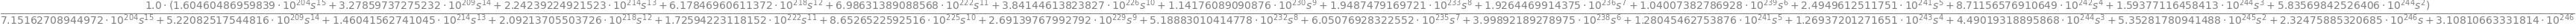

In [68]:
H = U[v2]/U[v1]
H

In [69]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)

x = np.logspace(1, 5, 2000, endpoint=False)*2*np.pi
w, mag, phase = signal.bode((a, b), w=x) # returns: rad/s, mag in dB, phase in deg

Load the csv file of frequency response data from LTSpice.

In [70]:
fn = 'Klon-Centaur_v2_freq_resp.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',',skip_header=1)

In [71]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
H_v2 = np.zeros(len(LTSpice_data)).astype(complex)

In [72]:
# convert the csv data to complex numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    H_v2[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j


Plot the results.  
Using

> np.unwrap(2 * phase) / 2) 

to keep the pahse plots the same.

Load the LTSpice csv file of frequency response data.

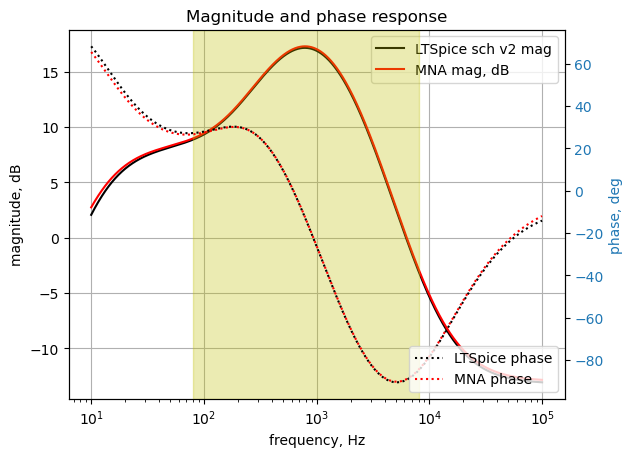

In [73]:
#| label: fig-ltspice-mna-freq-plot
#| echo: true
#| fig-cap: LTSpice and MNA data magnitude and phase response plotted for comparison

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

#w, mag, phase = effect_path_end_end_mag_phase

plt.semilogx(frequency[0:-1], 20*np.log10(np.abs(H_v2)[0:-1]),'-k',label='LTSpice sch v2 mag')    # LTSpice magnitude plot
plt.semilogx(w/(2*np.pi), mag,'-r',label='MNA mag, dB')    # MNA magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()
plt.legend(loc='upper right')

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency[0:-1], np.unwrap(2*np.angle(H_v2)[0:-1]/2) *180/np.pi,':',color='k',label='LTSpice phase')  # LTSpice phase plot
plt.semilogx(w/(2*np.pi), phase,':',color='r',label='MNA phase')  # MNA phase plot
plt.legend(loc='lower right')

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

# highlight the guitar audio band, 80 to 8kHz
plt.axvspan(80, 8e3, color='y', alpha=0.3)

plt.title('Magnitude and phase response')
plt.show()

Plot the results.  

What is the max gain and what frequency. Stability margins.

See plot @fig-ltspice-mna-freq-plot

Save the magitude data, since the by pass is resitivaly summed at the output jack by R26.  

Poles and zeros of the transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [74]:
sys_tf = signal.TransferFunction(a,b)

sys_zeros = np.roots(sys_tf.num)
sys_poles = np.roots(sys_tf.den)

Pole zero plot
The poles and zeros of the preamp transfer function are plotted.

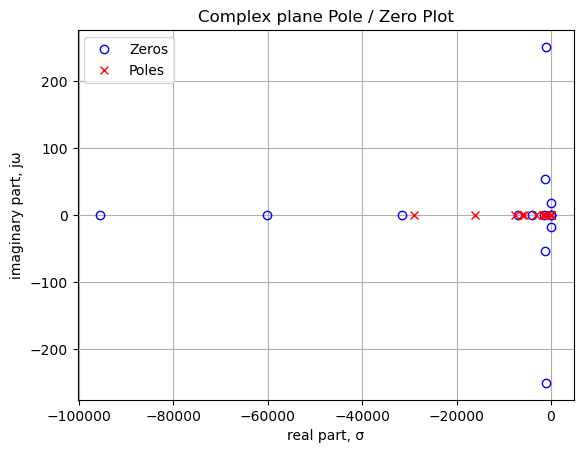

In [75]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=0)
plt.title('Complex plane Pole / Zero Plot')
plt.xlabel('real part, \u03C3')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [76]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 15
-15,192.35+0.00j Hz
-9,571.76+0.00j Hz
-5,025.50+0.00j Hz
-1,114.13+0.00j Hz
-650.31+0.00j Hz
-245.79+0.00j Hz
-195.14+8.48j Hz
-195.14-8.48j Hz
-161.54+39.89j Hz
-161.54-39.89j Hz
-2.63+2.81j Hz
-2.63-2.81j Hz
-0.75+0.00j Hz
0.00+0.00j Hz
0.00+0.00j Hz


In [77]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 15
-4,629.79 Hz
-2,545.69 Hz
-1,198.55 Hz
-967.04 Hz
-902.66 Hz
-495.13 Hz
-279.87 Hz
-231.62 Hz
-180.17 Hz
-166.72 Hz
-12.02 Hz
-6.60 Hz
-1.58 Hz
-0.79 Hz
-0.39 Hz


#### Impulse and step response
Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

[impulse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse.html)

[step](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step.html)

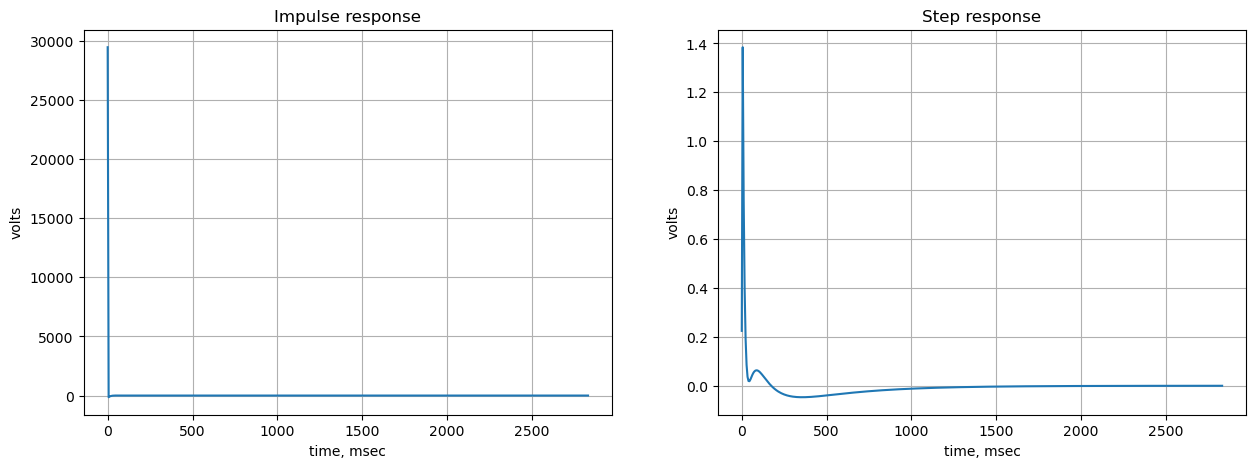

In [78]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse(sys_tf,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step(sys_tf,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()

#### Group delay
The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

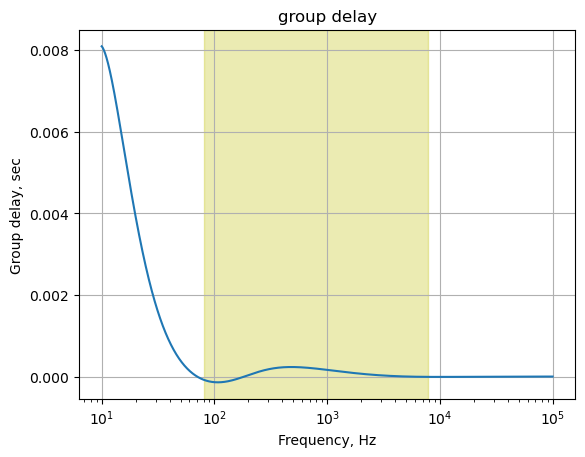

In [79]:
plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

# highlight the guitar audio band, 80 to 7.8kHz
plt.axvspan(80, 7.8e3, color='y', alpha=0.3)

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.grid()
plt.show()

## Summary for part 2